<a href="https://colab.research.google.com/github/sachinbb7/Machine-Learning-Projects/blob/main/Ad_Ease_Time_Series_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement:**

Ad Ease, a company that specializes in helping businesses get the most clicks at the lowest cost, is looking for a solution to automate and optimize their advertising campaigns. They need a system that can:

Design: Automatically generate visually appealing and effective ad creatives for different products and services.
Dispense: Intelligently place these ads on various platforms to reach the target audience.
Decipher: Analyze the performance of the ads and make data-driven decisions to improve future campaigns.
The goal is to develop an end-to-end solution that streamlines the entire advertising process, making it easier, more effective, and more economical for businesses to promote themselves.

### Key Requirements:

Automation: The system should automate as much of the advertising process as possible, from ad creation to placement and performance analysis.
Optimization: The system should continuously optimize the ads and their placement to maximize clicks and minimize costs.
Data-Driven Insights: The system should provide data-driven insights into the performance of the ads to inform future decisions.
Scalability: The system should be able to handle a large number of ad campaigns and creatives.
Ease of Use: The system should be easy to use for businesses of all sizes and technical expertise.

In [ ]:
!pip install pystan==2.19.1.1

!pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 29.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp310-cp310-linux_x86_64.whl size=61975135 sha256=2016061f60b96b8777cda66174c66bd538371857d13d71129555d02effab2c68
  Stored in directory: /root/.cache/pip/wheels/3d/1c/94/4516243362eedbedad15ac4389691ee3bf2d45bec2639c9d8b
Successfully built pystan


In [ ]:
from prophet import Prophet

In [ ]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20,8)


from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape

)

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))
    return "--------------------------------------"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the dataset and doing usual exploratory analysis steps like checking the structure & characteristics of the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_1.csv')

In [ ]:
df.shape

(145063, 551)

In [ ]:
df.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [ ]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


### **Checking for null values for first 1000 records to understand the data**

<Axes: >

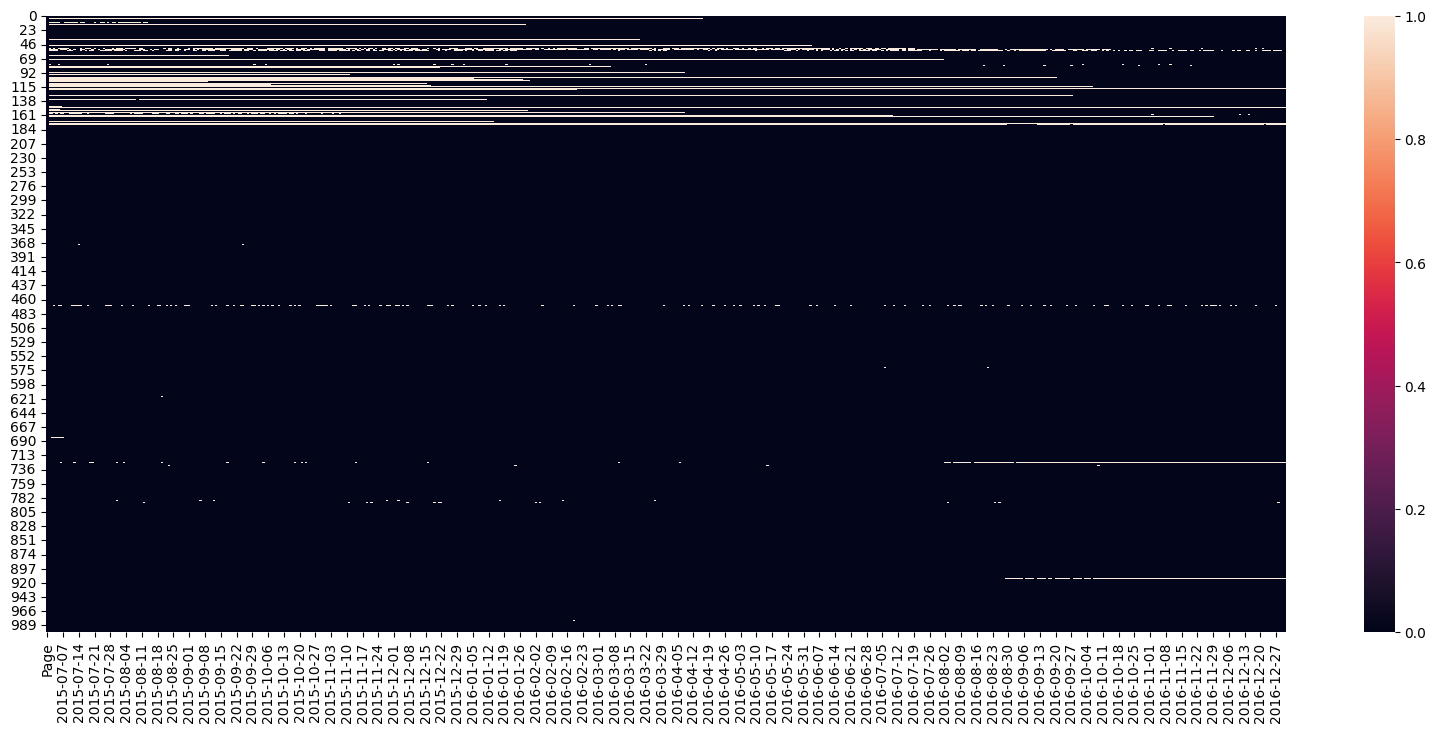

In [ ]:
sns.heatmap(df.head(1000).isna())

Text(0, 0.5, 'Number of missing values')

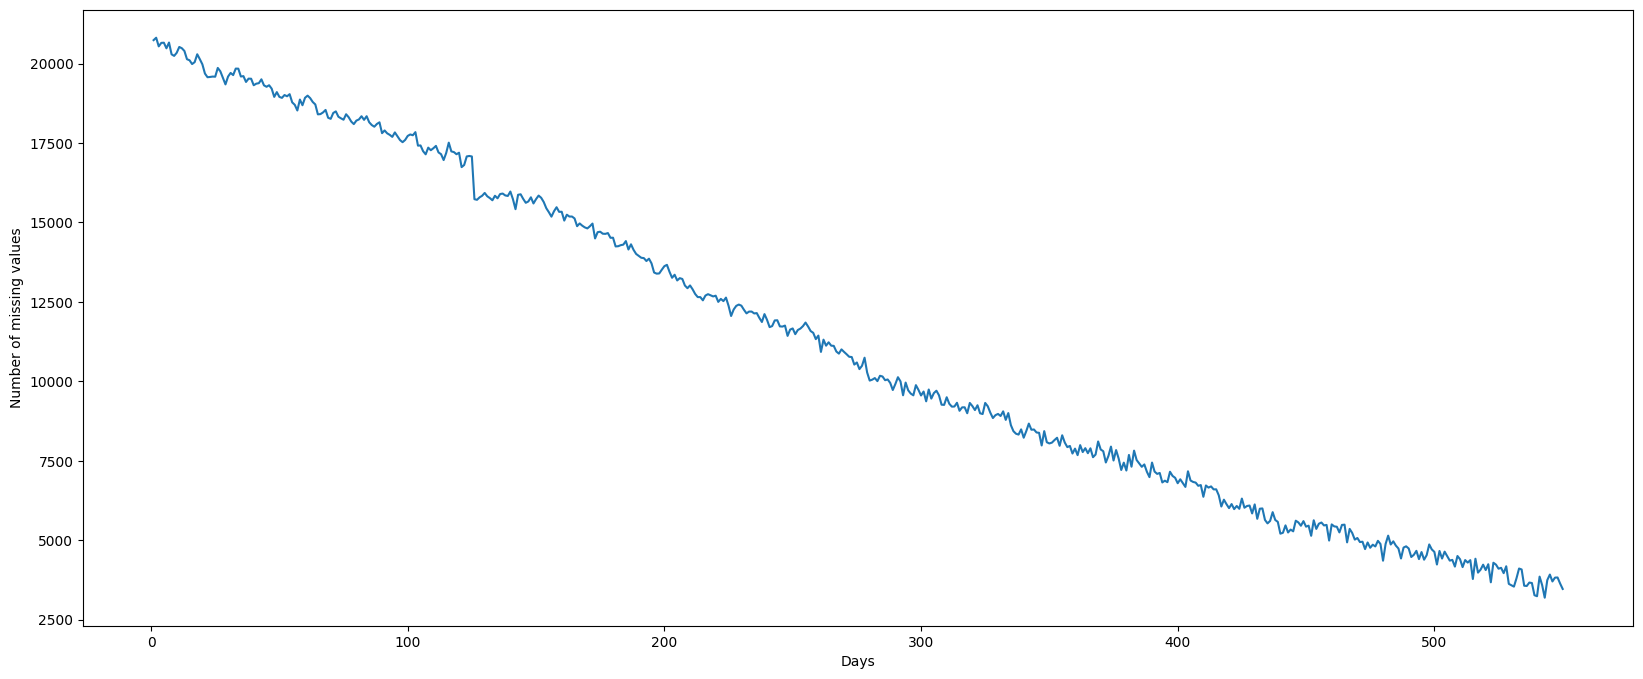

In [ ]:
days = [days for days in range(1, len(df.columns))]
plt.plot(days, df.isna().sum()[1:])
plt.xlabel("Days")
plt.ylabel("Number of missing values")

### **Dropping the rows which has less than 300 non-nulls.**

Reason : Given data is for 551 days : so considering 300 would be decent threshold to train the model so the forecast can be accurately predicted

In [ ]:
x_train= df.dropna(thresh= 300)

Text(0, 0.5, 'Number of missing values')

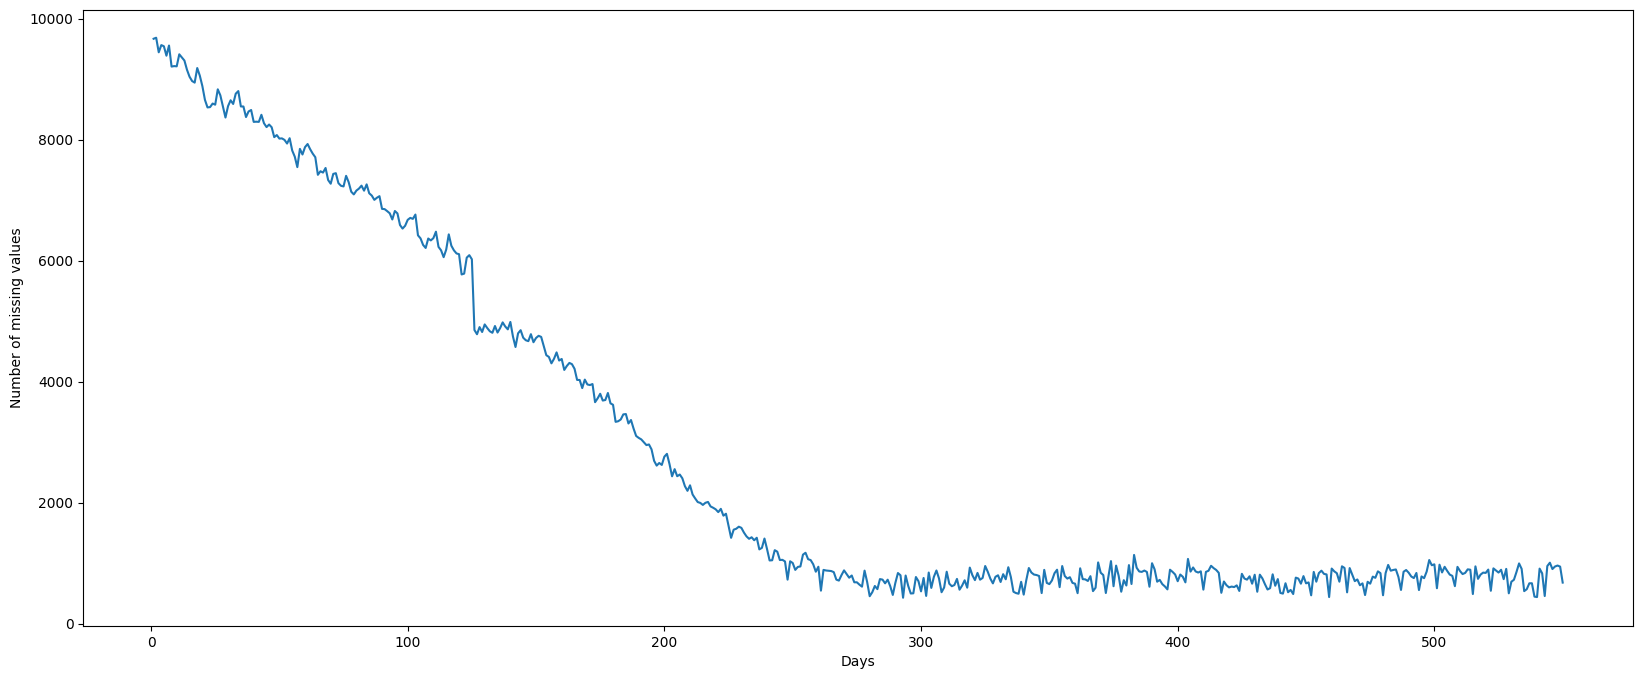

In [ ]:
days = [days for days in range(1, len(x_train.columns))]
plt.plot(days, x_train.isna().sum()[1:])
plt.xlabel("Days")
plt.ylabel("Number of missing values")

### **For filling up "nan" values - I have used "0" assuming the Pages had no visit on the days where the value is "nan" where the minimum value for a given wiki page on a day is 0**

In [ ]:
x_train.fillna(0, inplace=True)

In [ ]:
x_train.isna().sum().sum()

0

## Exploratory Data Analysis

In [ ]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


### Separating the data, Analyzing and visualizing the data and Getting inferences

In [ ]:
import re

def lang(x):
  value = re.search("[a-z][a-z].wikipedia.org", x)
  if value :
    return(value[0][0:2])

  else:
    return "no lang"


x_train["Language"]= x_train["Page"].apply(lambda x : lang(str(x)))

In [ ]:
x_train["Access_Origin"]= x_train["Page"].str.split(".wikipedia.org", expand=True)[1].str.split("_", expand= True)[2]

In [ ]:
x_train["Access_Type"]= x_train["Page"].str.split(".wikipedia.org", expand=True)[1].str.split("_", expand= True)[1]

<Axes: xlabel='Language', ylabel='count'>

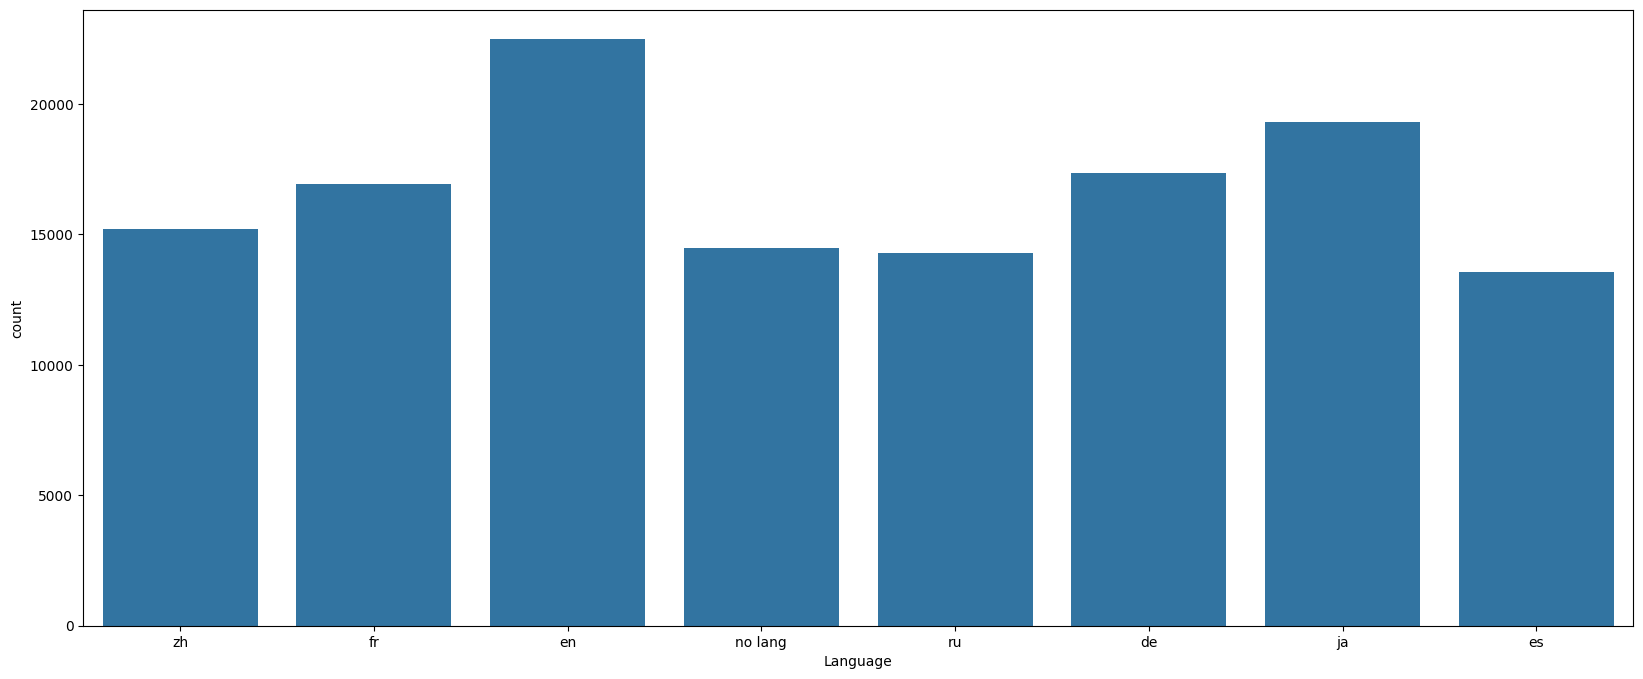

In [ ]:
sns.countplot(data = x_train, x = "Language")

Inferences:

1. "en" and "ja" have the most number of wikipedia pages in the given data-set
2. It's observed that "all-agents" have the highest count in "access origin"
3. "all access" Access type has the most number of views.

<Axes: xlabel='Access_Origin', ylabel='count'>

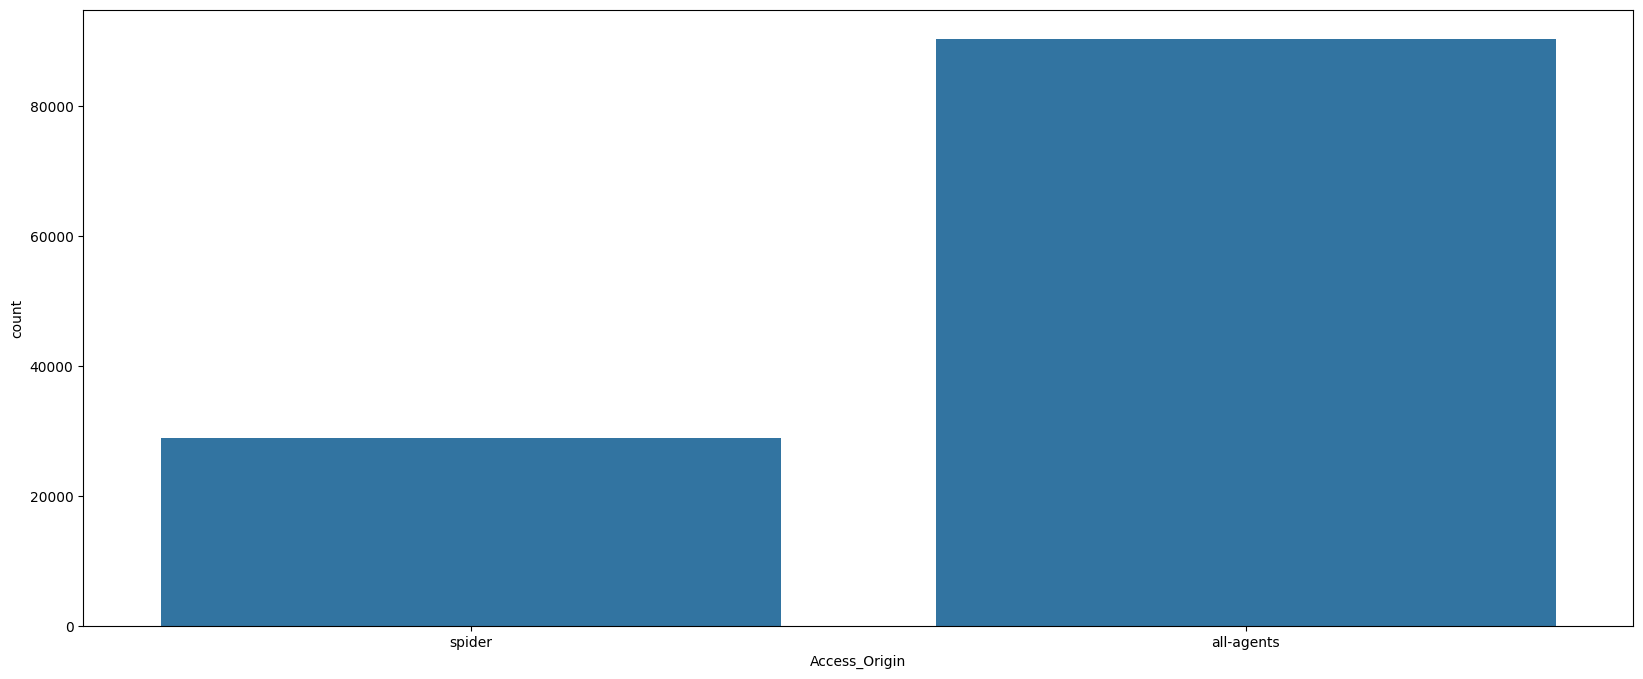

In [ ]:
sns.countplot(data = x_train, x = "Access_Origin")

<Axes: xlabel='Access_Type', ylabel='count'>

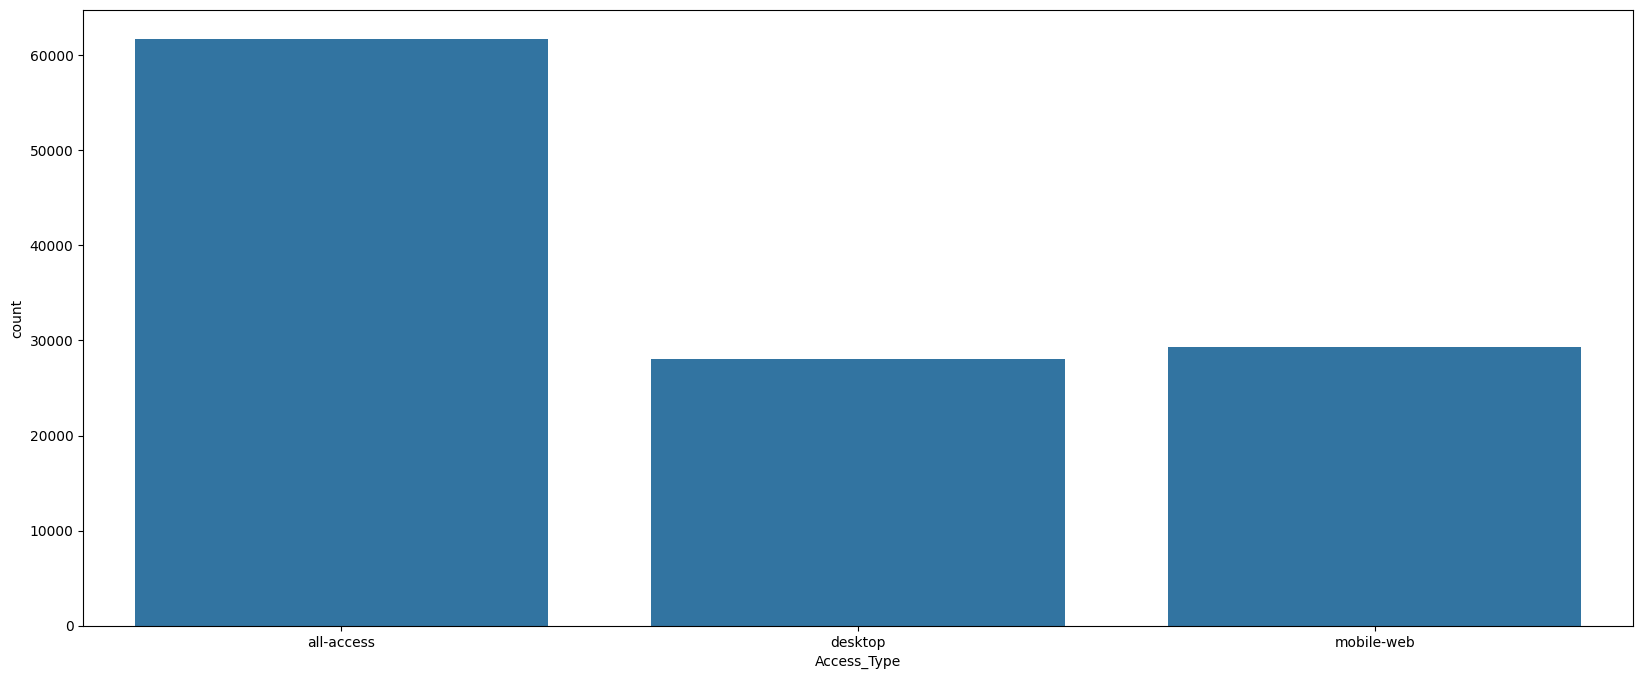

In [ ]:
sns.countplot(data = x_train, x = "Access_Type")

## Checking stationarity

### Formatting the data for the model

In [ ]:
df_lang= x_train.groupby("Language").mean().T

In [ ]:
df_lang.reset_index(inplace=True)
df_lang.set_index("index", inplace=True)
#df_lang.drop(columns= ["level_0"], inplace=True)
df_lang.head()

Language,de,en,es,fr,ja,no lang,ru,zh
index,,,,,,,,
2015-07-01,763.765926,3767.328604,1127.485204,499.092872,614.637160,102.733545,663.199229,272.498521
2015-07-02,753.362861,3755.158765,1077.485425,502.297852,705.813216,107.663447,674.677015,272.906778
2015-07-03,723.074415,3565.225696,990.895949,483.007553,637.451671,101.769629,625.329783,271.097167
2015-07-04,663.537323,3711.782932,930.303151,516.275785,800.897435,86.853871,588.171829,273.712379
2015-07-05,771.358657,3833.433025,1011.759575,506.871666,768.352319,96.254105,626.385354,291.977713


In [ ]:
df_lang.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 2015-07-01 to 2016-12-31
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   de       550 non-null    float64
 1   en       550 non-null    float64
 2   es       550 non-null    float64
 3   fr       550 non-null    float64
 4   ja       550 non-null    float64
 5   no lang  550 non-null    float64
 6   ru       550 non-null    float64
 7   zh       550 non-null    float64
dtypes: float64(8)
memory usage: 54.8+ KB


In [ ]:
df_lang.describe()

Language,de,en,es,fr,ja,no lang,ru,zh
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,920.132431,4696.102005,1262.718183,676.223824,795.415559,140.005862,1008.694303,360.019883
std,113.698558,1002.624383,243.896218,106.004422,123.390312,30.088058,400.046560,55.559063
min,659.246803,3404.818465,661.190982,408.049386,459.217569,80.850421,520.451647,201.872592
25%,842.919091,4067.847727,1073.408734,625.143778,707.100402,121.258176,850.022407,321.070229
50%,902.335906,4476.529018,1254.068740,673.184447,787.965354,134.334690,943.973090,365.649924
75%,984.461626,4976.601852,1486.028042,728.986459,870.032431,153.260711,1027.563700,392.908290
max,1345.687709,8881.476519,2182.491255,1163.224628,1521.886551,329.439699,3105.466643,718.062784


In [ ]:
df_lang.index.name = "Date"

In [ ]:
df_lang.head()

Language,de,en,es,fr,ja,no lang,ru,zh
Date,,,,,,,,
2015-07-01,763.765926,3767.328604,1127.485204,499.092872,614.637160,102.733545,663.199229,272.498521
2015-07-02,753.362861,3755.158765,1077.485425,502.297852,705.813216,107.663447,674.677015,272.906778
2015-07-03,723.074415,3565.225696,990.895949,483.007553,637.451671,101.769629,625.329783,271.097167
2015-07-04,663.537323,3711.782932,930.303151,516.275785,800.897435,86.853871,588.171829,273.712379
2015-07-05,771.358657,3833.433025,1011.759575,506.871666,768.352319,96.254105,626.385354,291.977713


In [ ]:
df_lang

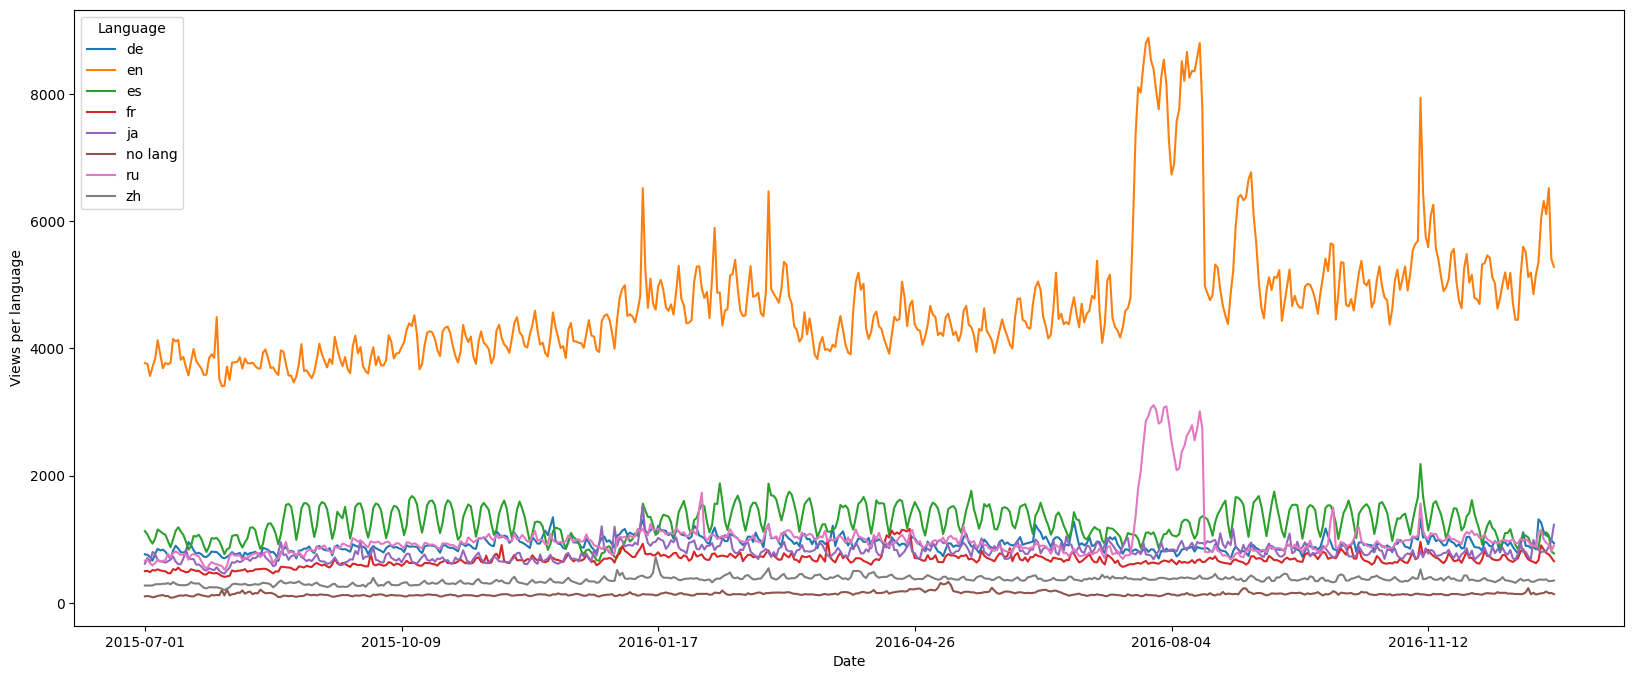

In [ ]:
df_lang.plot()
plt.ylabel("Views per language")
plt.show()

### Dickey fuller test

In [ ]:
def ad_test(x):

  result = adfuller(x)
  print(f'ADFuller statistics : {result[0]}')
  print(f'p-value: {round(result[1],3)}')

  if result[1]<0.05:
    print("Time Series is Stationary \n")
  else:
    print("Not Stationary \n")

ad_test(df_lang["en"])

ADFuller statistics : -2.373562974569941
p-value: 0.149
Not Stationary 



### Decomposition

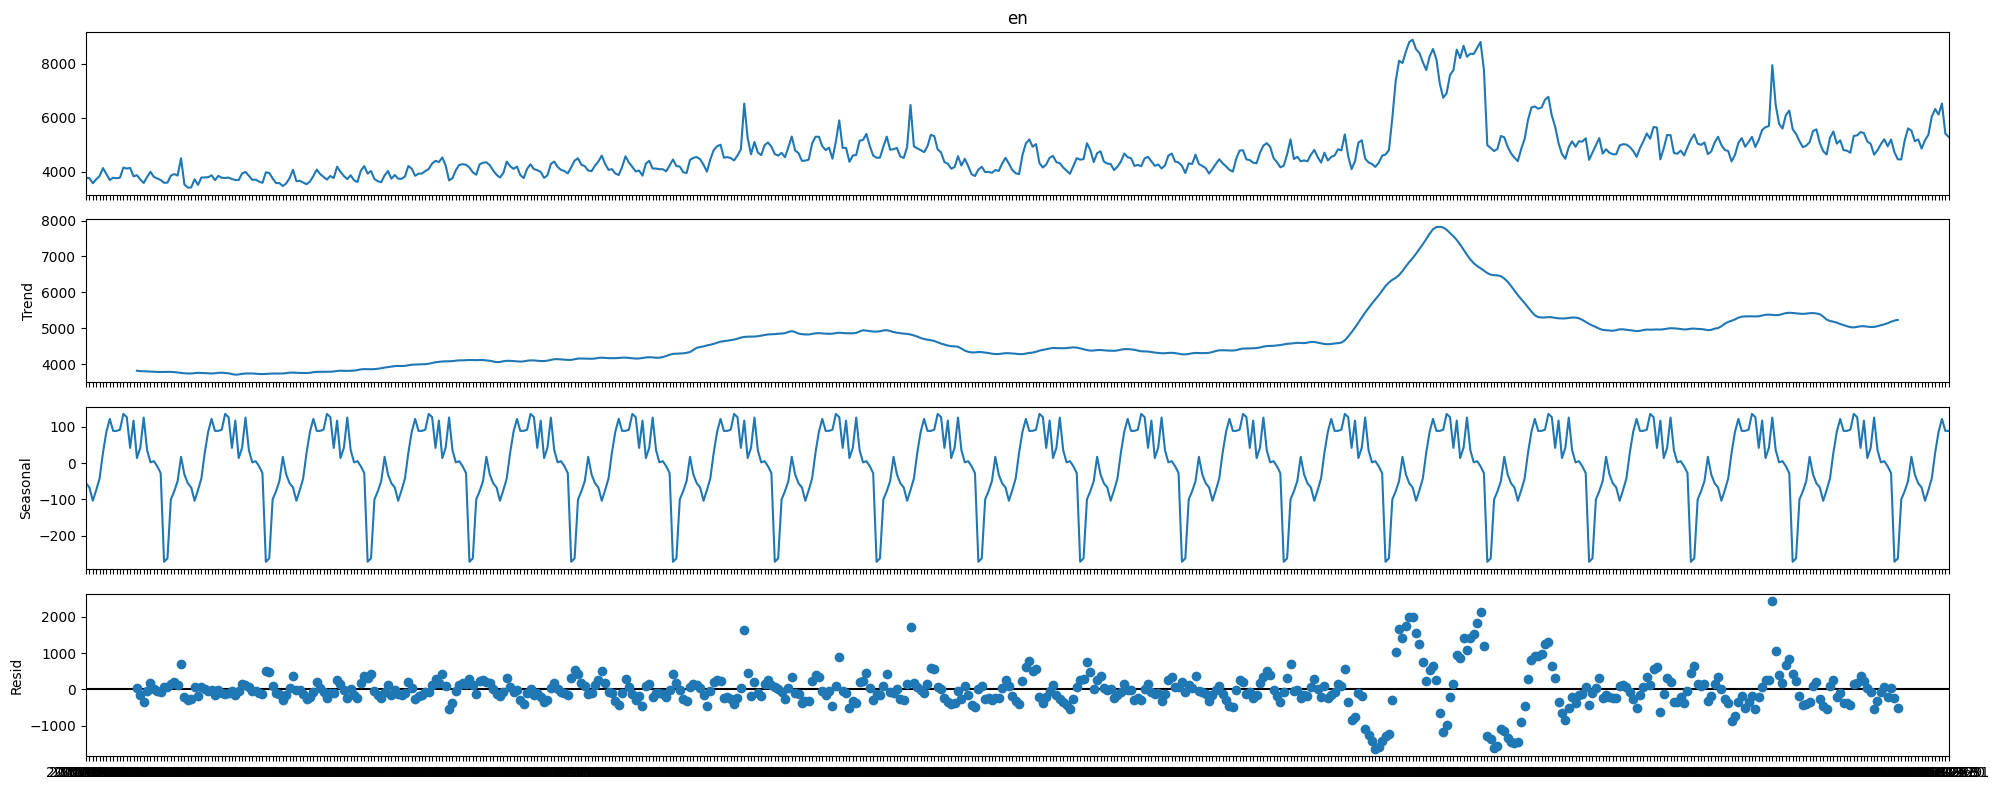

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose( df_lang["en"]  , model='additive', period = 30)

decomposition.plot();
plt.show()

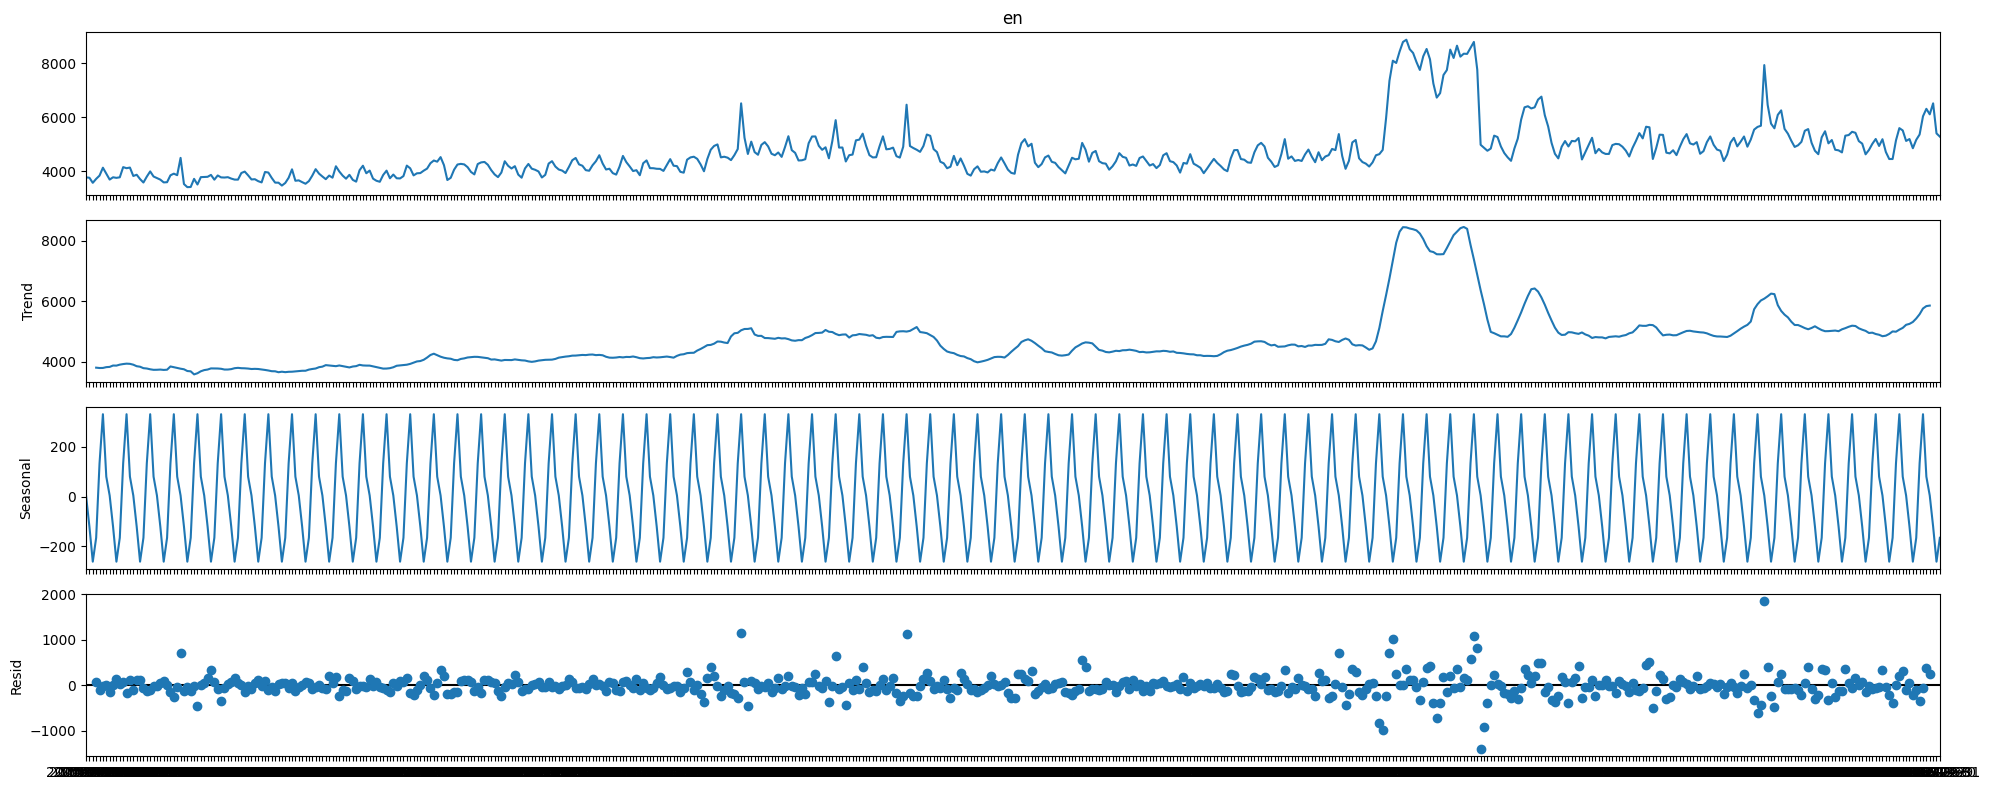

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose( df_lang["en"]  , model='additive', period = 7)

decomposition.plot();
plt.show()

<Axes: xlabel='Date'>

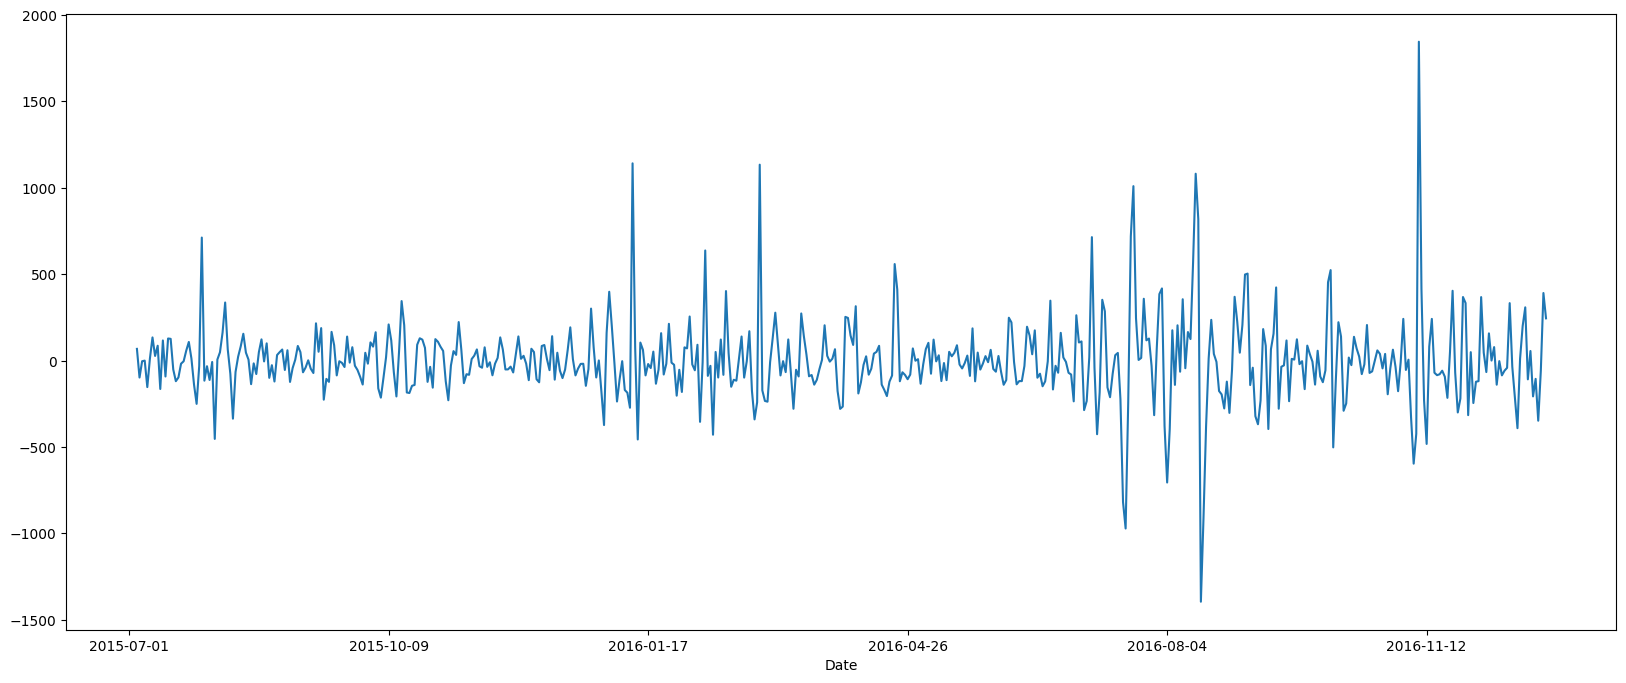

In [ ]:
decomposition.resid.plot()

In [ ]:
def ad_test(x):

  result = adfuller(x)
  print(f'ADFuller statistics : {result[0]}')
  print(f'p-value: {round(result[1],3)}')

  if result[1]<0.05:
    print("Time Series is Stationary \n")
  else:
    print("Not Stationary \n")

ad_test(decomposition.resid.dropna())

ADFuller statistics : -11.437315717171517
p-value: 0.0
Time Series is Stationary 



### Differencing

In [ ]:
def ad_test(x):

  result = adfuller(x)
  print(f'ADFuller statistics : {result[0]}')
  print(f'p-value: {round(result[1],3)}')

  if result[1]<0.05:
    print("Time Series is Stationary \n")
  else:
    print("Not Stationary \n")

ad_test(df_lang["en"].diff().diff(7).dropna())

ADFuller statistics : -12.28150228293546
p-value: 0.0
Time Series is Stationary 



In [ ]:
def ad_test(x):

  result = adfuller(x)
  print(f'ADFuller statistics : {result[0]}')
  print(f'p-value: {round(result[1],3)}')

  if result[1]<0.05:
    print("Time Series is Stationary \n")
  else:
    print("Not Stationary \n")

ad_test(df_lang["en"].diff().dropna())

ADFuller statistics : -8.27359005849382
p-value: 0.0
Time Series is Stationary 



## Creating model training and forecasting with ARIMA, SARIMAX

### ACF and PACF plot

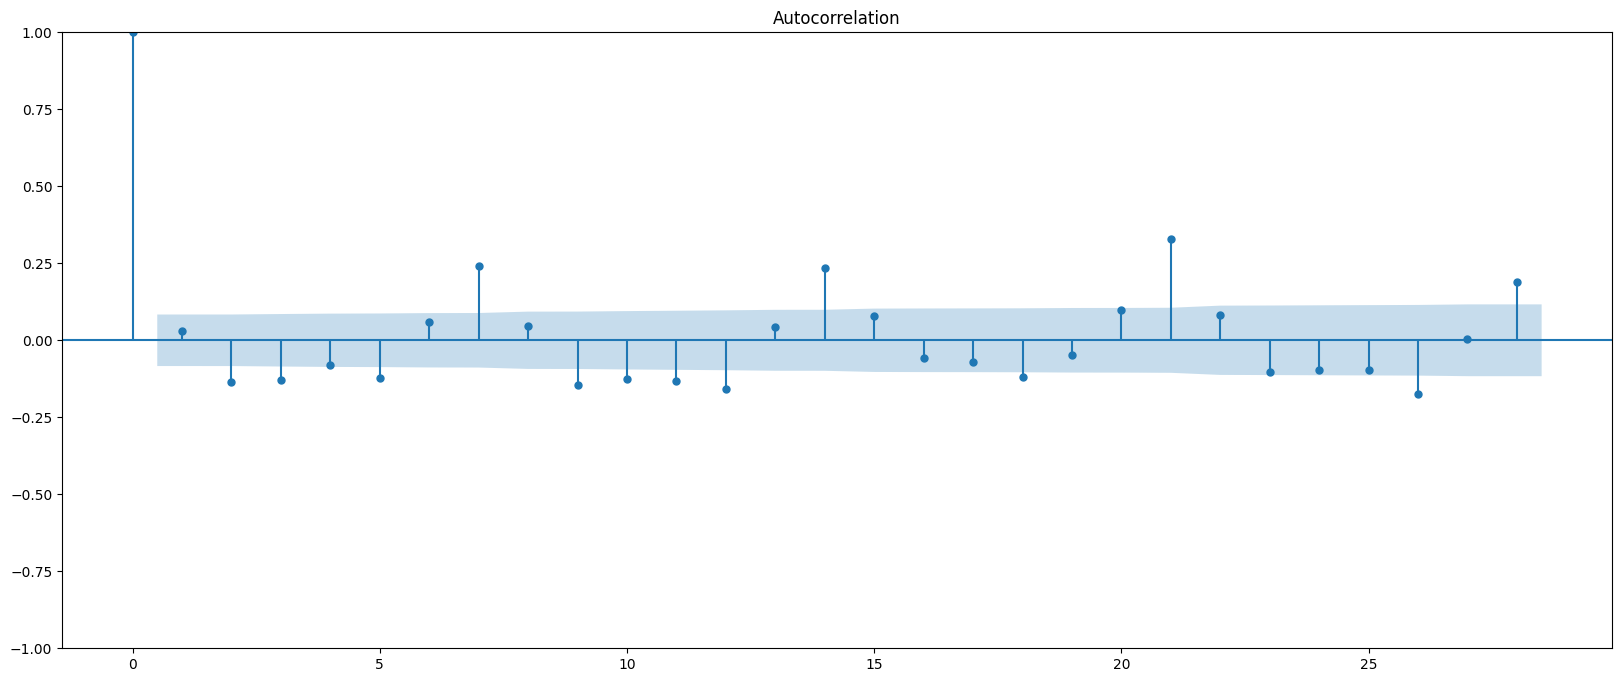

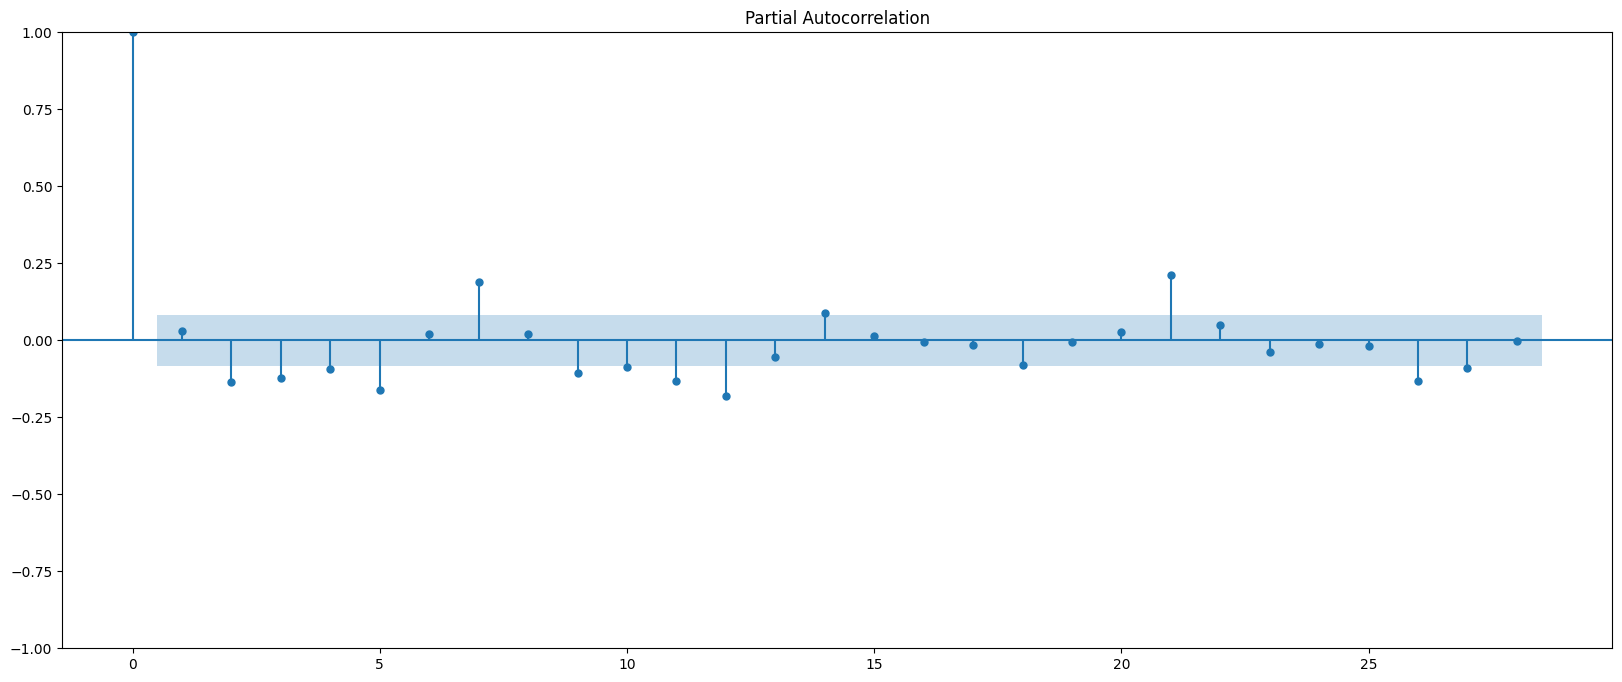

In [ ]:
plot_acf(df_lang.en.diff().dropna());
plot_pacf(df_lang.en.diff().dropna());

### Training the model , Forecasting for different languages/regions and Plotting the final results

In [ ]:
train_max_date = df_lang["en"].index[-30]
train_x = df_lang["en"].loc[df_lang["en"].index < df_lang["en"].index[-30]].copy()
test_x = df_lang["en"].loc[df_lang["en"].index >= df_lang["en"].index[-30]].copy()

test_x = pd.DataFrame(test_x, columns = ["en"])
train_x = pd.DataFrame(train_x, columns = ["en"])

In [ ]:
df_lang["en"].head()

Date
2015-07-01    3767.328604
2015-07-02    3755.158765
2015-07-03    3565.225696
2015-07-04    3711.782932
2015-07-05    3833.433025
Name: en, dtype: float64

## Exponential Smoothing

MAE : 306.87
RMSE : 445.669
MAPE: 0.056


'--------------------------------------'

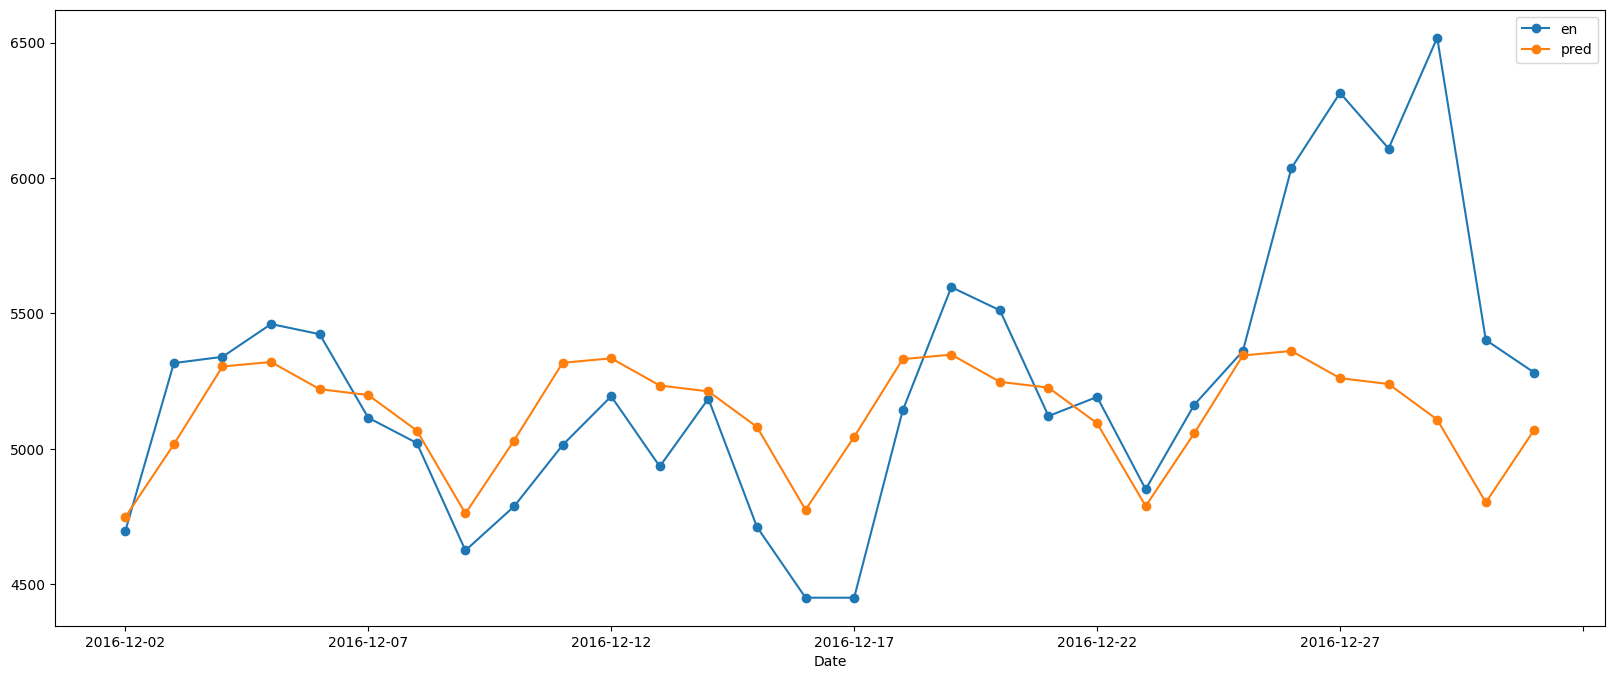

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

model = ExponentialSmoothing(train_x["en"], trend='add', seasonal='add', freq= "D").fit(smoothing_level=1/(2*7))
test_x['pred'] = model.forecast(steps=30)
test_x.plot(style='-o')
performance(test_x['en'], test_x['pred'])

## **ARIMA**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

grid_search = [1,2,3,4]

for i in grid_search :

  model = ARIMA(train_x, order= (i,1,7), freq="D")
  predict = model.fit()
  test_x["pred"]= predict.forecast(30)

  print(f"Performance score for p = {i}")
  print(performance(test_x["en"], test_x['pred']))
  print("\n")

Performance score for p = 1
MAE : 437.843
RMSE : 583.571
MAPE: 0.079
--------------------------------------


Performance score for p = 2
MAE : 384.939
RMSE : 548.862
MAPE: 0.069
--------------------------------------


Performance score for p = 3
MAE : 394.245
RMSE : 559.73
MAPE: 0.07
--------------------------------------


Performance score for p = 4
MAE : 401.351
RMSE : 573.689
MAPE: 0.071
--------------------------------------




MAE : 384.939
RMSE : 548.862
MAPE: 0.069
--------------------------------------


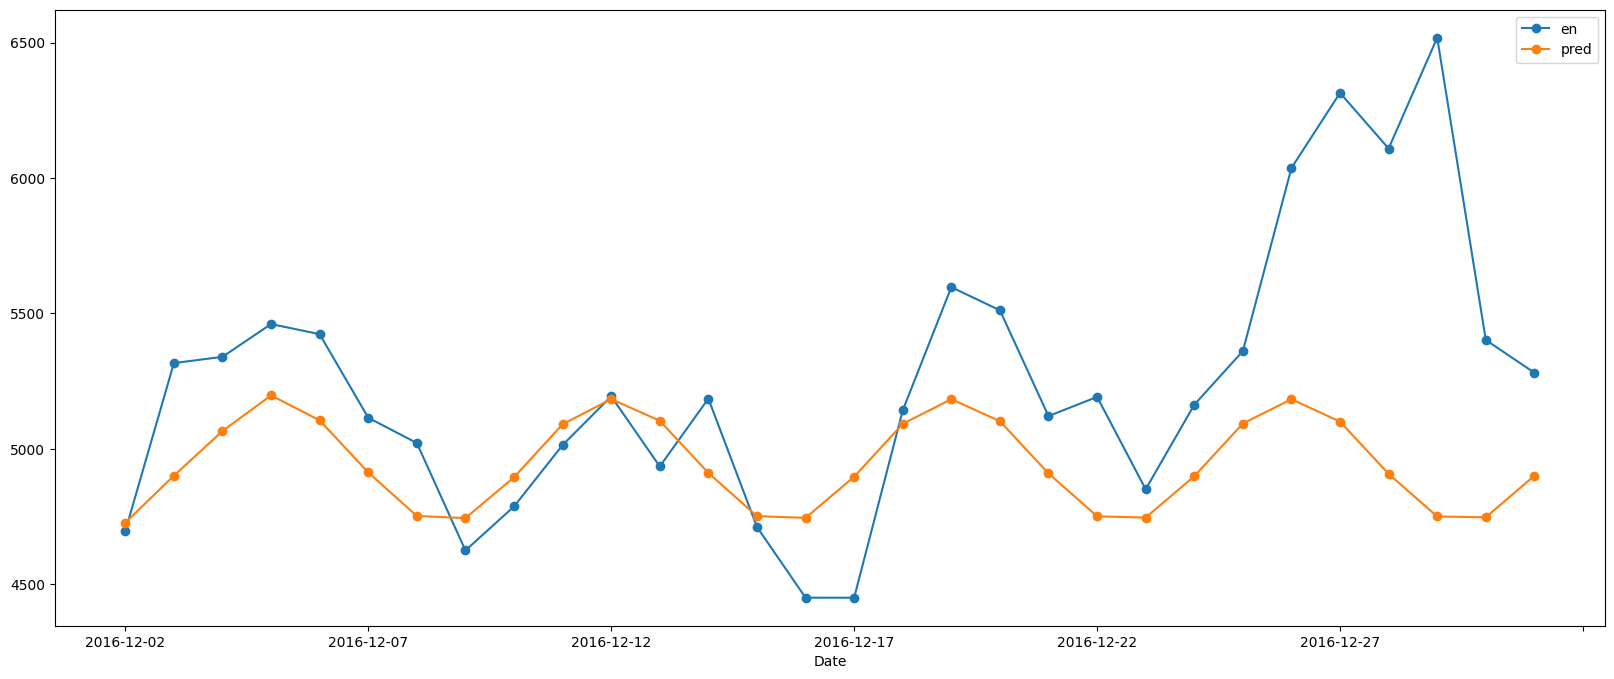

In [ ]:
model = ARIMA(train_x, order= (2,1,7) , freq="D")
predict = model.fit()
test_x["pred"]= predict.forecast(30)
test_x.plot(style='-o')

print(performance(test_x["en"], test_x['pred']))

## **SARIMAX**

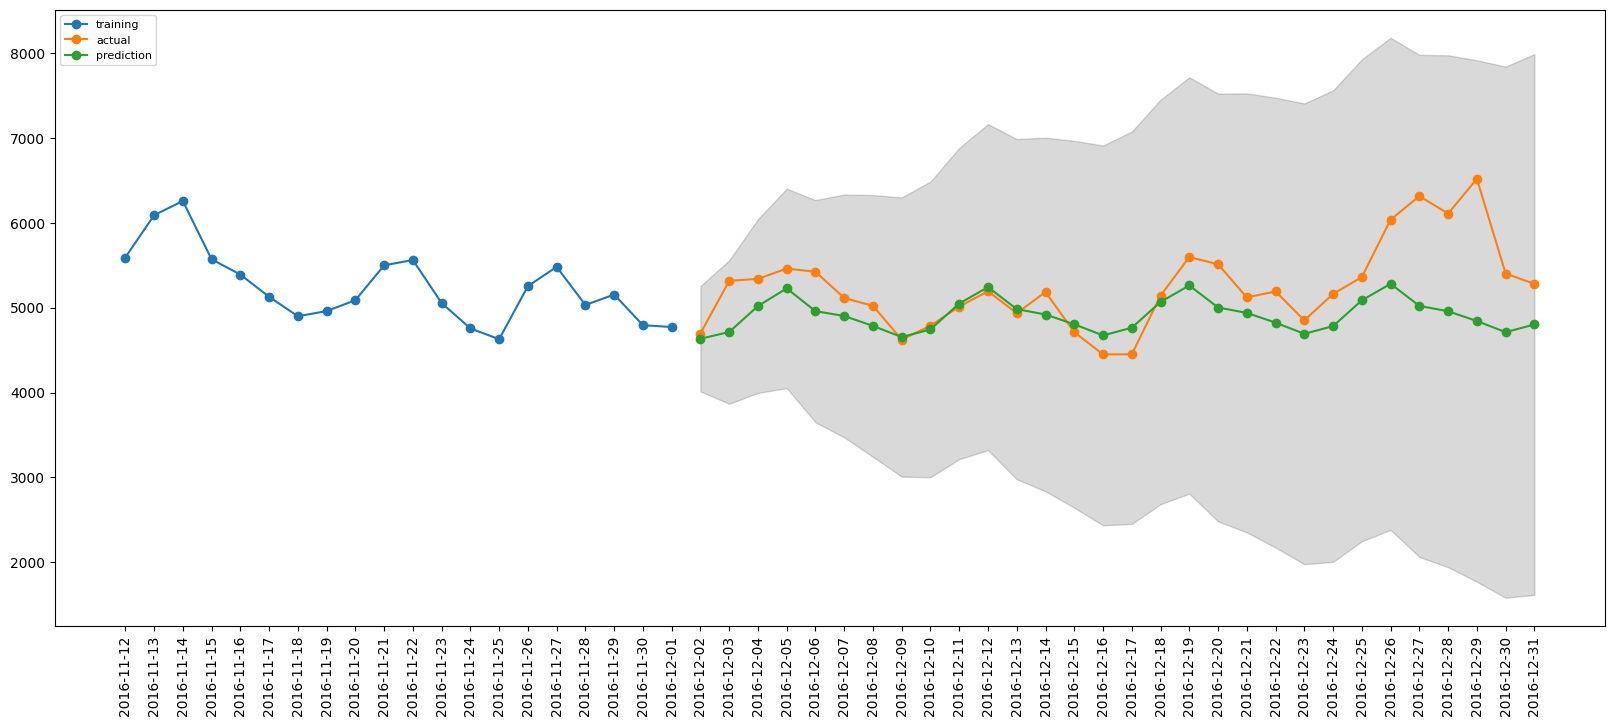

MAE : 385.177
RMSE : 546.147
MAPE: 0.069
--------------------------------------


In [ ]:
from statsmodels.tsa.statespace.sarimax  import SARIMAX

model = SARIMAX(train_x, order= (2,1,1), seasonal_order = (1,1,1,7), freq="D")
predict = model.fit()

forecast = predict.get_forecast(steps=30)
test_x['pred'] = forecast.predicted_mean
test_x[['lower', 'upper']] = forecast.conf_int(alpha=0.05)

plt.plot(train_x['en'][-20:], '-o', label='training')
plt.plot(test_x['en'], '-o', label='actual')
plt.plot(test_x['pred'], '-o', label='prediction')
plt.fill_between(test_x.index, test_x['lower'], test_x['upper'], color='k', alpha=.15)
plt.legend(loc='upper left', fontsize=8)
plt.xticks(rotation= 90)
plt.show()

print(performance(test_x["en"], test_x['pred']))


In [ ]:
exog_data= pd.read_csv('/content/drive/MyDrive/AdEase/Exog_Campaign_eng')

In [ ]:
exog = np.array(exog_data["Exog"])

In [ ]:
len(exog)

550

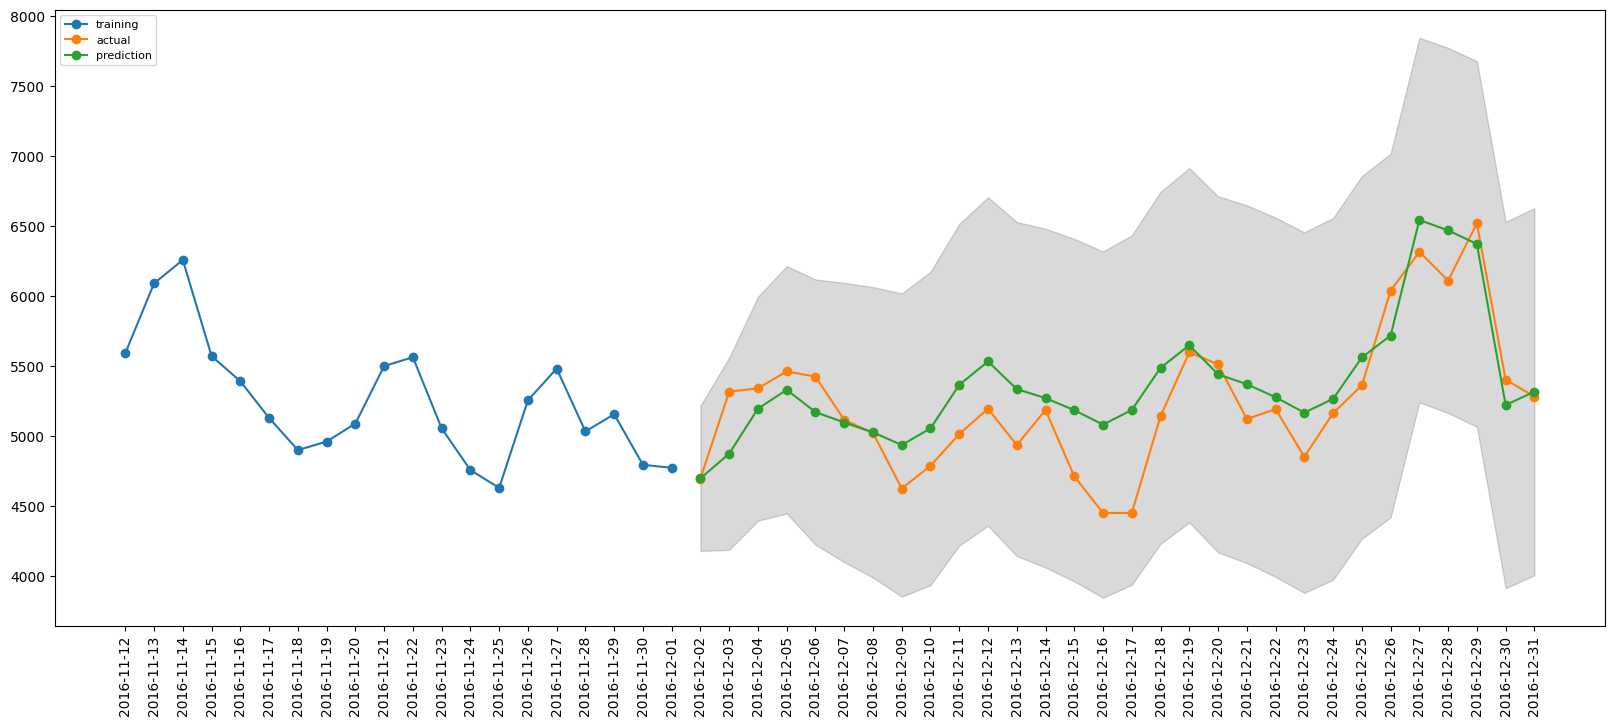

MAE : 242.477
RMSE : 300.961
MAPE: 0.048
--------------------------------------


In [ ]:
model = SARIMAX(train_x, order= (2,1,1), seasonal_order = (1,1,1,7), exog= exog[:-30], freq="D")
predict = model.fit()

forecast = predict.get_forecast(steps=30, dynamic=True,exog=pd.DataFrame(exog[520:]))
test_x['pred'] = forecast.predicted_mean
test_x[['lower', 'upper']] = forecast.conf_int(alpha=0.05)

plt.plot(train_x['en'][-20:], '-o', label='training')
plt.plot(test_x['en'], '-o', label='actual')
plt.plot(test_x['pred'], '-o', label='prediction')
plt.fill_between(test_x.index, test_x['lower'], test_x['upper'], color='k', alpha=.15)
plt.legend(loc='upper left', fontsize=8)
plt.xticks(rotation= 90)
plt.show()

print(performance(test_x["en"], test_x['pred']))


In [ ]:
df_lang.reset_index()

Language,Date,de,en,es,fr,ja,no lang,ru,zh
0,2015-07-01,763.765926,3767.328604,1127.485204,499.092872,614.637160,102.733545,663.199229,272.498521
1,2015-07-02,753.362861,3755.158765,1077.485425,502.297852,705.813216,107.663447,674.677015,272.906778
2,2015-07-03,723.074415,3565.225696,990.895949,483.007553,637.451671,101.769629,625.329783,271.097167
3,2015-07-04,663.537323,3711.782932,930.303151,516.275785,800.897435,86.853871,588.171829,273.712379
4,2015-07-05,771.358657,3833.433025,1011.759575,506.871666,768.352319,96.254105,626.385354,291.977713
...,...,...,...,...,...,...,...,...,...
545,2016-12-27,1119.596936,6314.335275,1070.923400,840.590217,808.541436,155.270181,998.374071,363.066991
546,2016-12-28,1062.284069,6108.874144,1108.996753,783.585379,807.430163,178.561267,945.054730,369.049701
547,2016-12-29,1033.939062,6518.058525,1058.660320,763.209169,883.752786,150.873534,909.352207,340.526330
548,2016-12-30,981.786430,5401.792360,807.551177,710.502773,979.278777,156.049193,815.475123,342.745316


## **Prophet Model**

In [ ]:
prophet_data = pd.concat([pd.DataFrame(data= df_lang.reset_index()[["Date", "en"]]), pd.Series(exog)], axis=1).rename(columns= { "Date": "ds" , "en" : "y", 0 : "exog"})

In [ ]:
prophet_data.head()

,ds,y,exog
0,2015-07-01,3767.328604,0
1,2015-07-02,3755.158765,0
2,2015-07-03,3565.225696,0
3,2015-07-04,3711.782932,0
4,2015-07-05,3833.433025,0


In [ ]:
prophet_data.describe()

,y,exog
count,550.000000,550.000000
mean,4696.102005,0.098182
std,1002.624383,0.297831
min,3404.818465,0.000000
25%,4067.847727,0.000000
50%,4476.529018,0.000000
75%,4976.601852,0.000000
max,8881.476519,1.000000


In [ ]:
prophet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      550 non-null    object 
 1   y       550 non-null    float64
 2   exog    550 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 13.0+ KB


In [ ]:
import io, os, sys, setuptools, tokenize


In [ ]:
!pip install pystan==2.19.1.1 prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 32.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp310-cp310-linux_x86_64.whl size=61975552 sha256=b05f7e7bdb3d3cb6be885763e7d0835614dc528c45589d4e07058627e6f371db
  Stored in directory: /root/.cache/pip/wheels/3d/1c/94/4516243362eedbedad15ac4389691ee3bf2d45bec2639c9d8b
Successfully built pystan


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj5dljcw5/a9jfumob.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj5dljcw5/pq5iumxn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32299', 'data', 'file=/tmp/tmpj5dljcw5/a9jfumob.json', 'init=/tmp/tmpj5dljcw5/pq5iumxn.json', 'output', 'file=/tmp/tmpj5dljcw5/prophet_modelwkmu27p0/prophet_model-20240308075621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE : 462.487
RMSE : 717.596
MAPE: 0.088
--------------------------------------


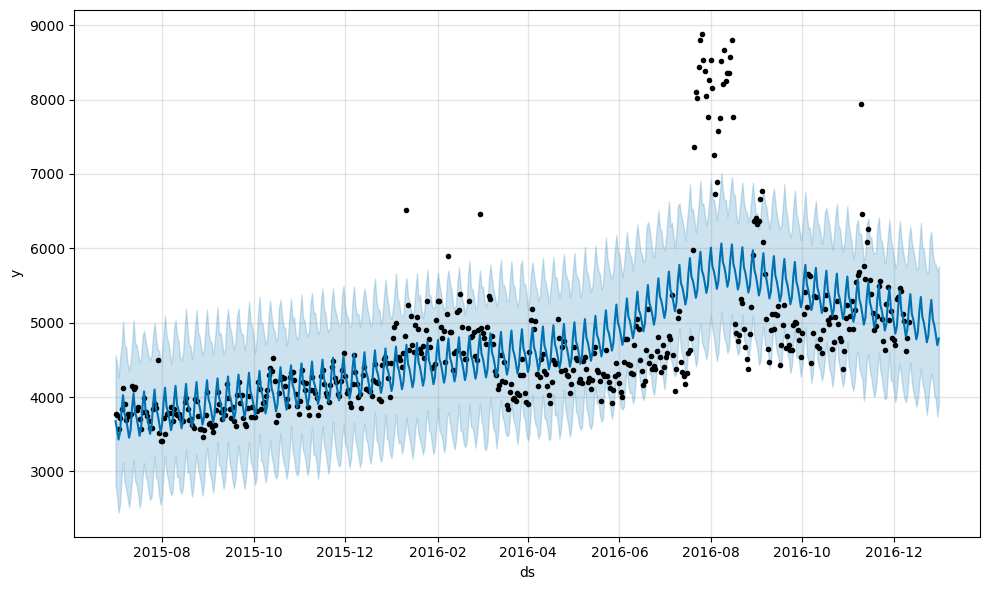

In [ ]:
m = Prophet(weekly_seasonality=True)
m.fit(prophet_data[:-20])

future = m.make_future_dataframe(periods=20, freq='D')

forecast = m.predict(future)
fig = m.plot(forecast)


y_actual = prophet_data['y'].values
y_predicted = forecast['yhat'].values

print(performance(y_actual, y_predicted))


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj5dljcw5/1ianrey0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj5dljcw5/etck7zhf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28801', 'data', 'file=/tmp/tmpj5dljcw5/1ianrey0.json', 'init=/tmp/tmpj5dljcw5/etck7zhf.json', 'output', 'file=/tmp/tmpj5dljcw5/prophet_modelbenra28p/prophet_model-20240308074210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


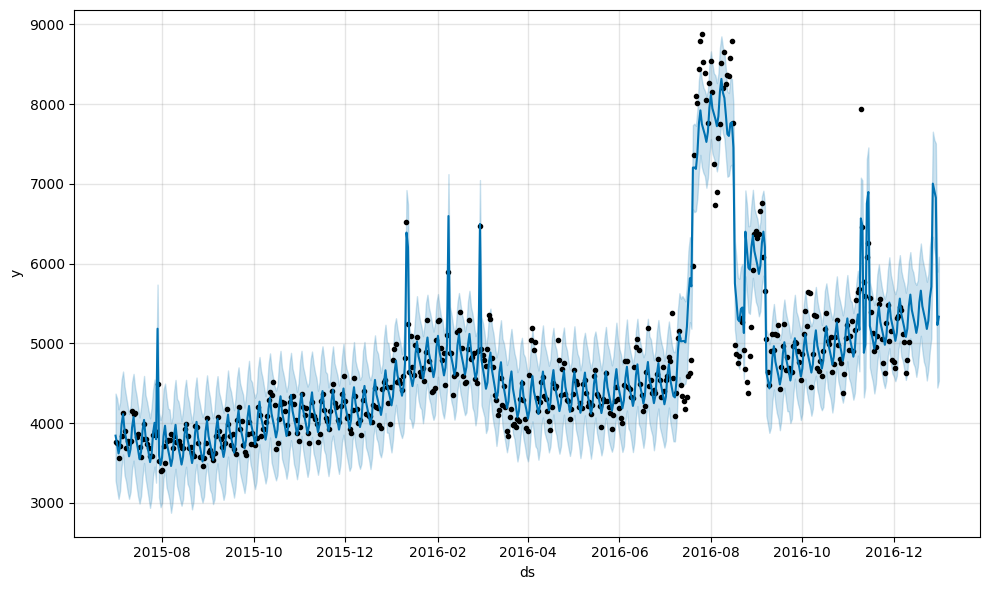

In [ ]:
m2=Prophet(interval_width=0.9, weekly_seasonality=True, changepoint_prior_scale=1)
m2.add_regressor('exog')
m2.fit(prophet_data[:-20])
forecast2 = m2.predict(prophet_data)
fig = m2.plot(forecast2)
plt.show()

MAE : 220.82
RMSE : 337.918
MAPE: 0.044
--------------------------------------


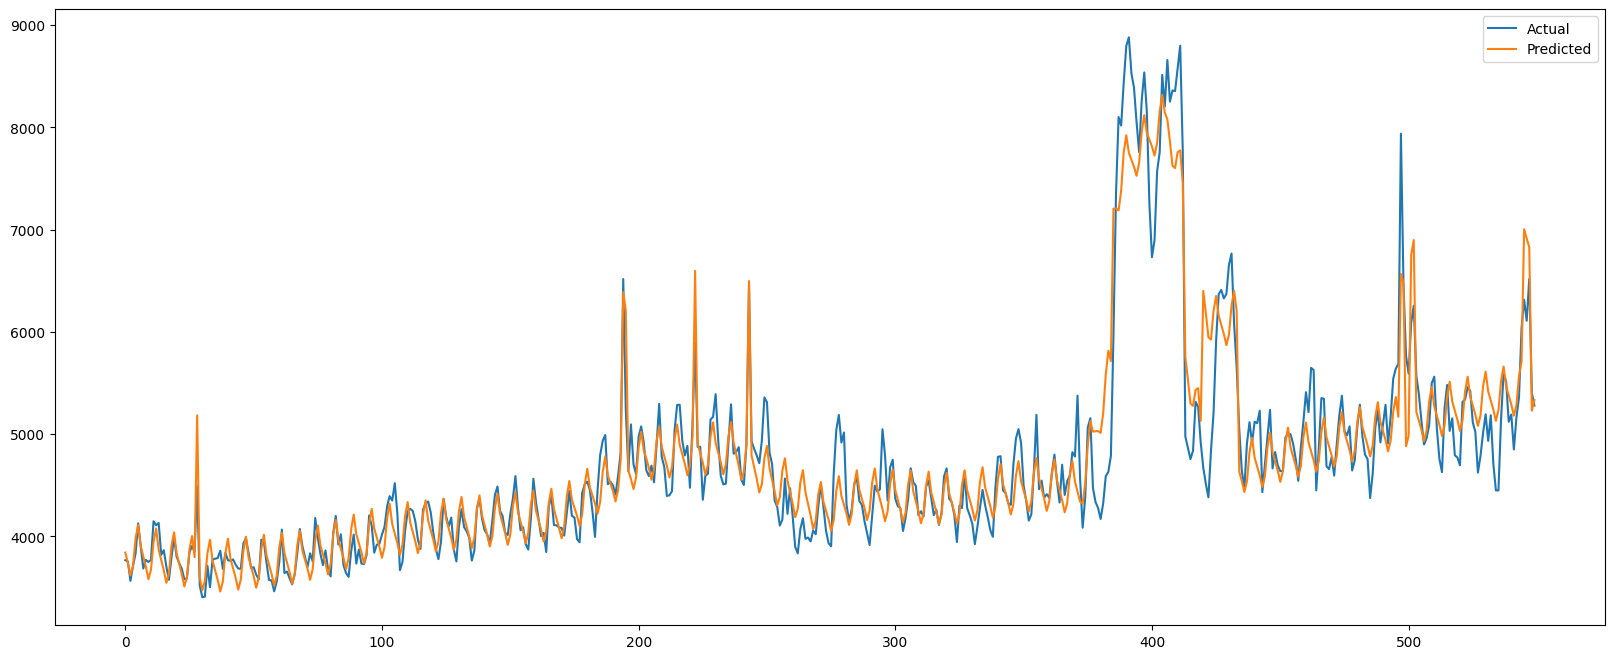

In [ ]:
y_actual = prophet_data['y'].values
y_predicted = forecast2['yhat'].values

print(performance(y_actual, y_predicted))


plt.plot(y_actual, label='Actual')
plt.plot(y_predicted, label='Predicted')
plt.legend()


plt.show()

## **Creating a pipeline for working with multiple series**

### Forecasting for different languages/regions

language:  de
0.06660326885136633 [1, 2, 3]


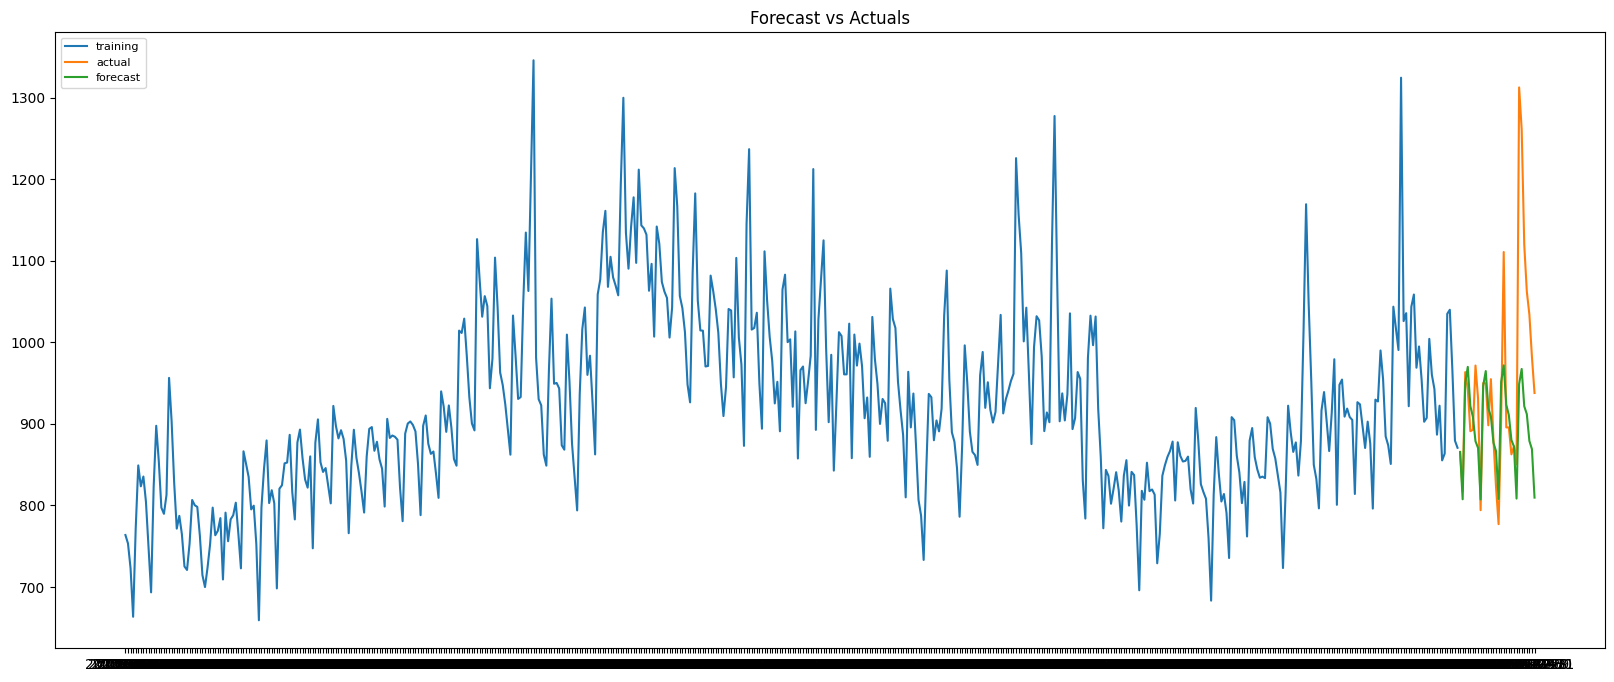

mape: 0.06660326885136633
rsme: 112.30818883531416
language:  en
0.05571000219289557 [1, 1, 2]


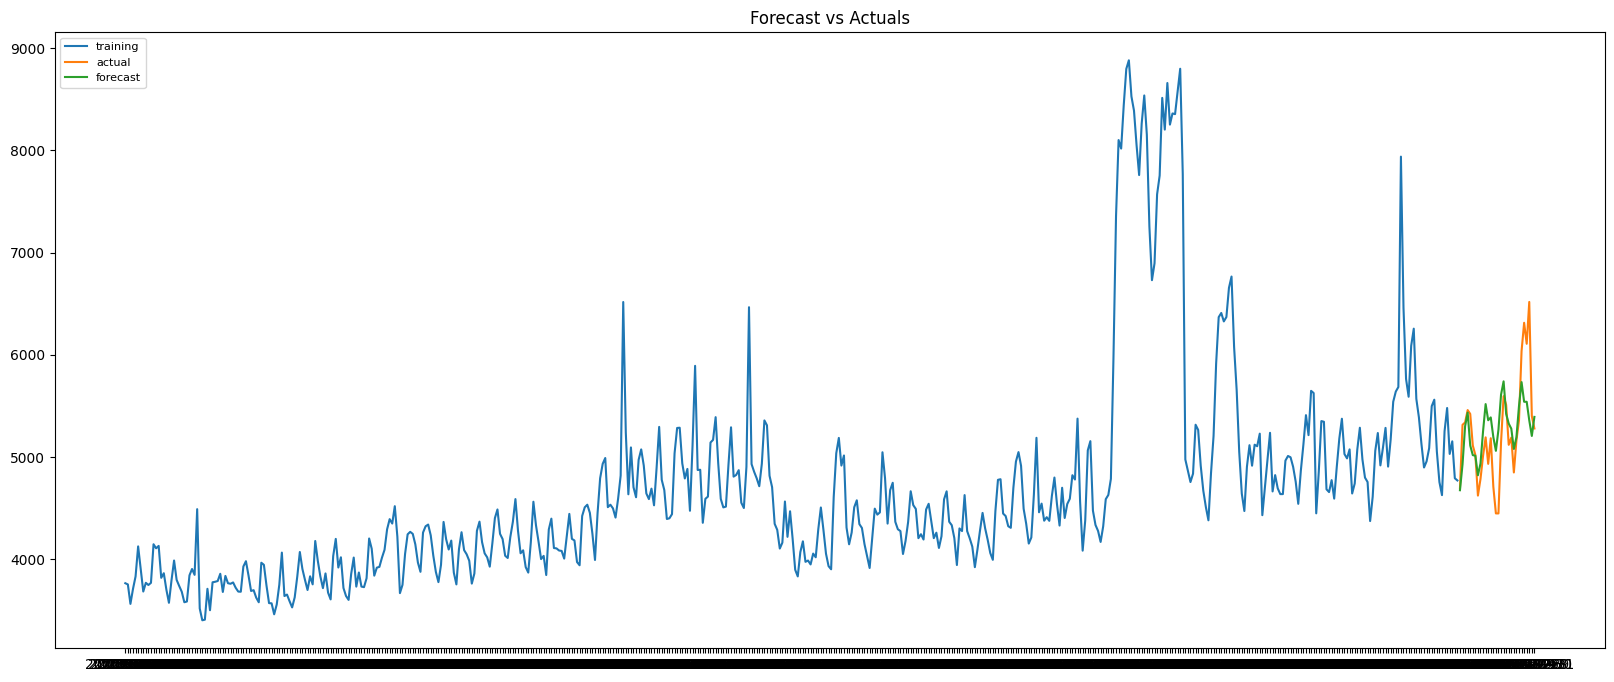

mape: 0.05571000219289557
rsme: 398.4294212981051
language:  es
0.08144501092526896 [2, 1, 0]


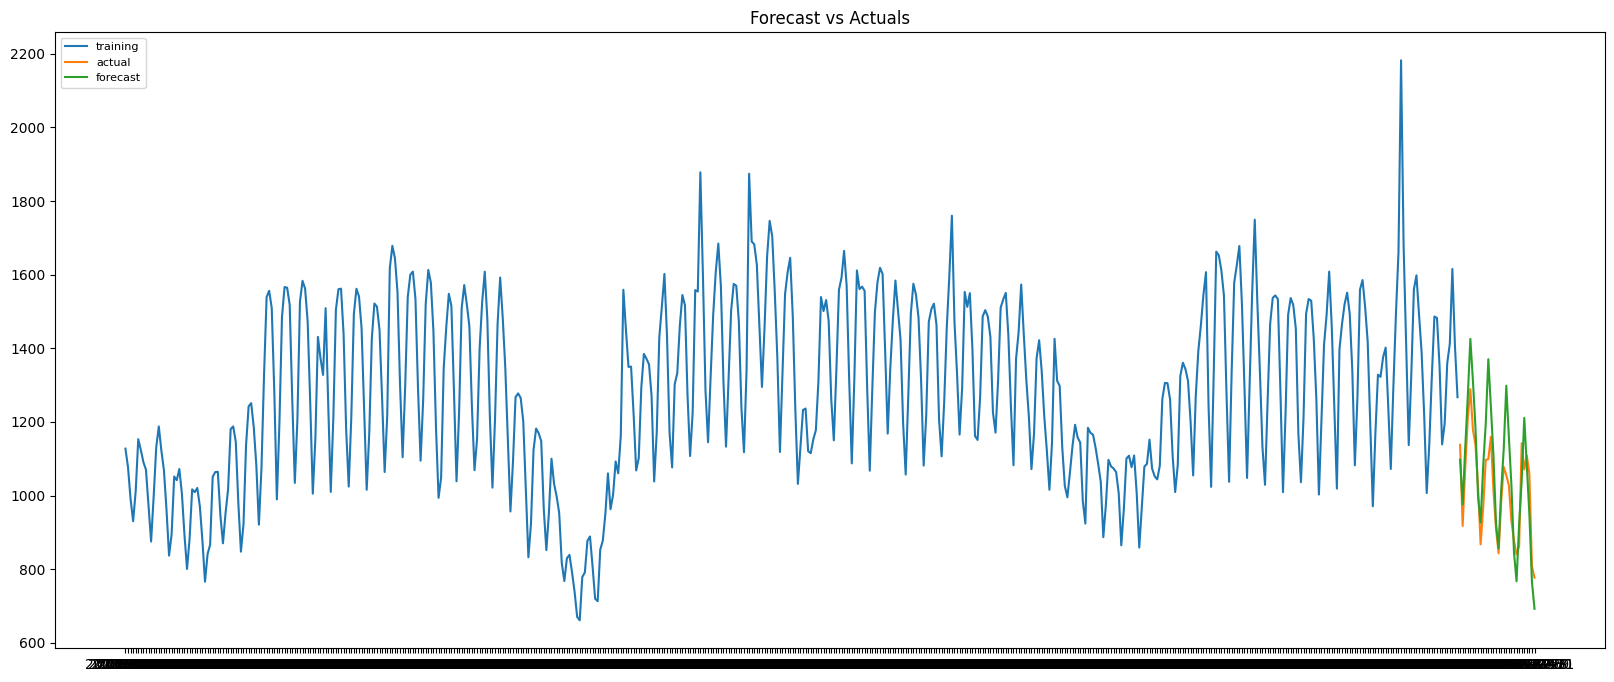

mape: 0.08144501092526896
rsme: 102.91561394672289
language:  fr
0.05954571352626601 [2, 1, 2]


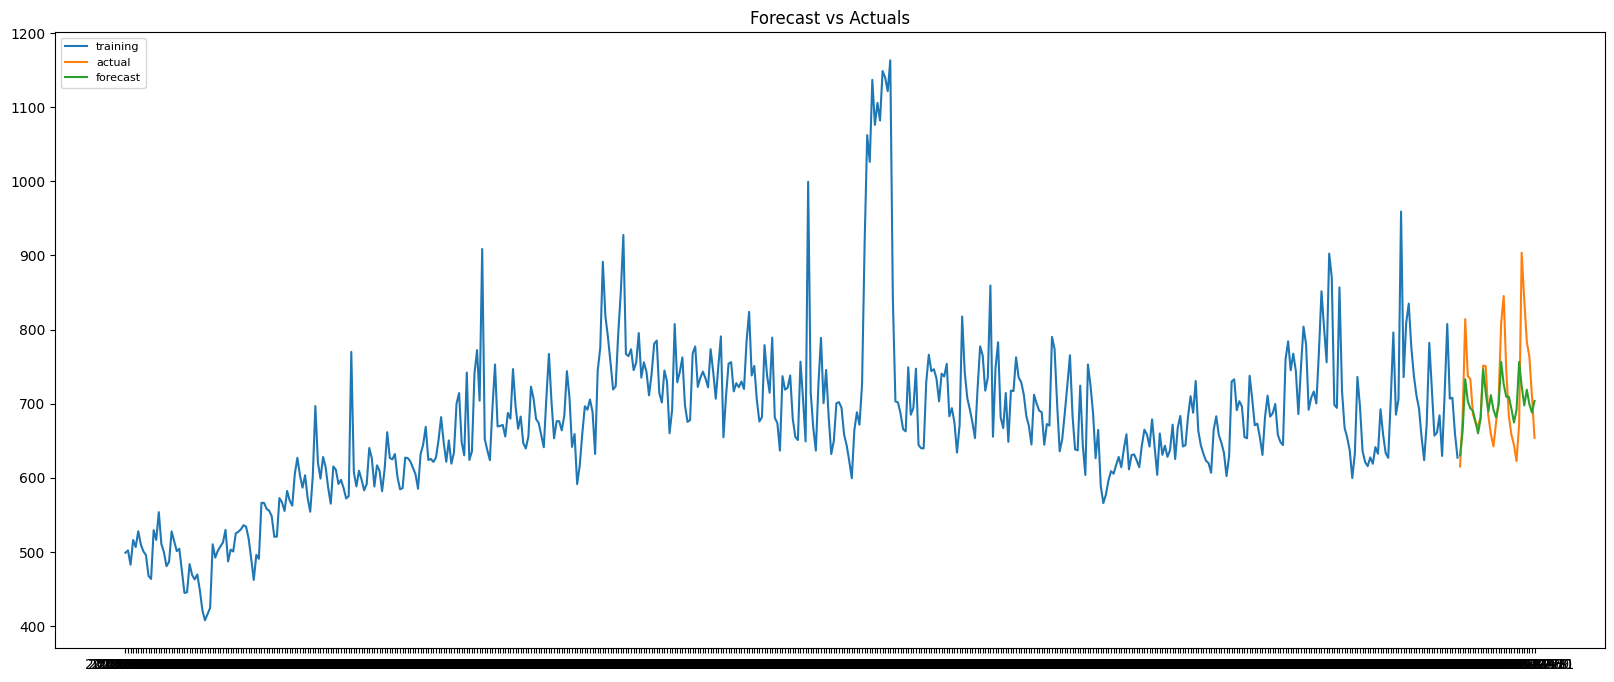

mape: 0.05954571352626601
rsme: 61.48913408553905
language:  ja
0.07341193168799383 [2, 1, 3]


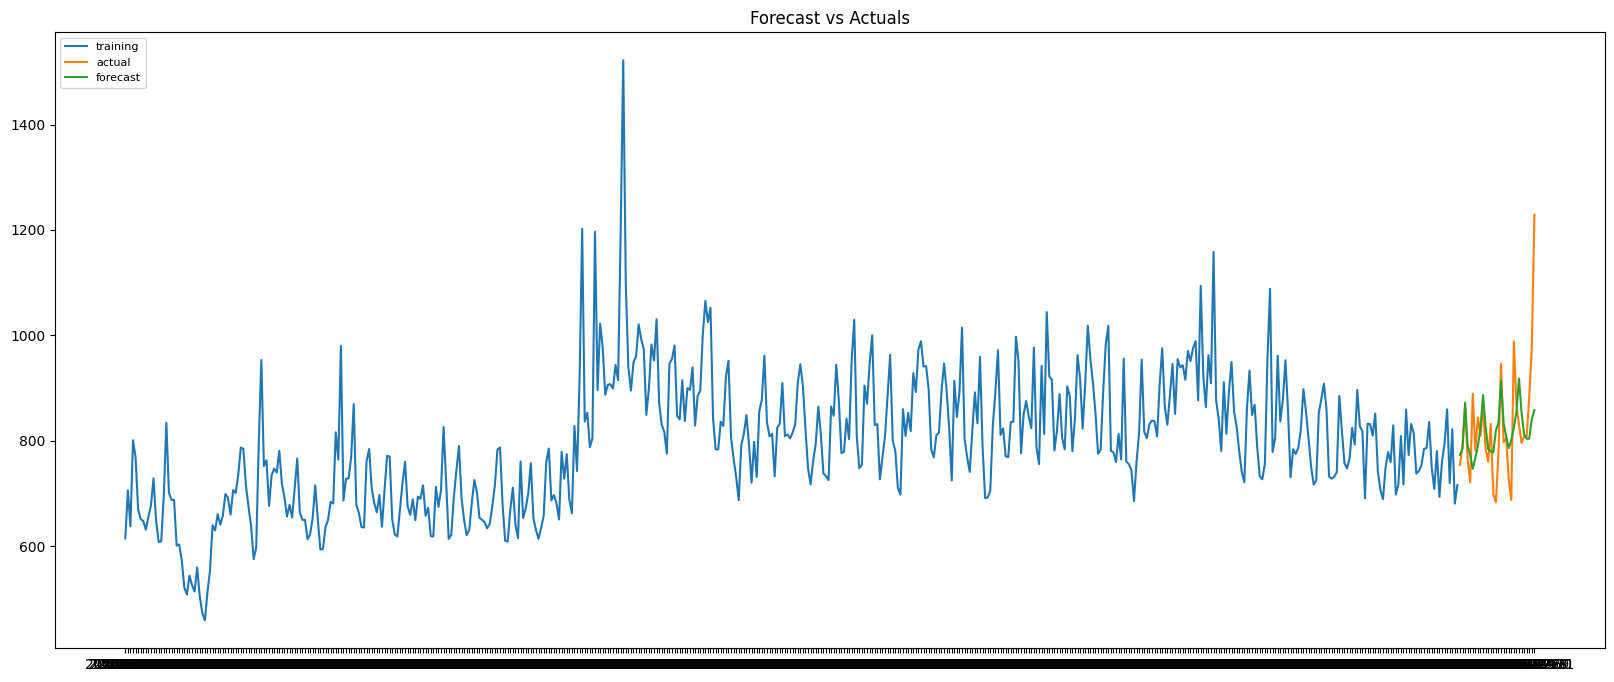

mape: 0.07341193168799383
rsme: 96.75374813702884
language:  no lang
0.06579889824530792 [3, 2, 1]


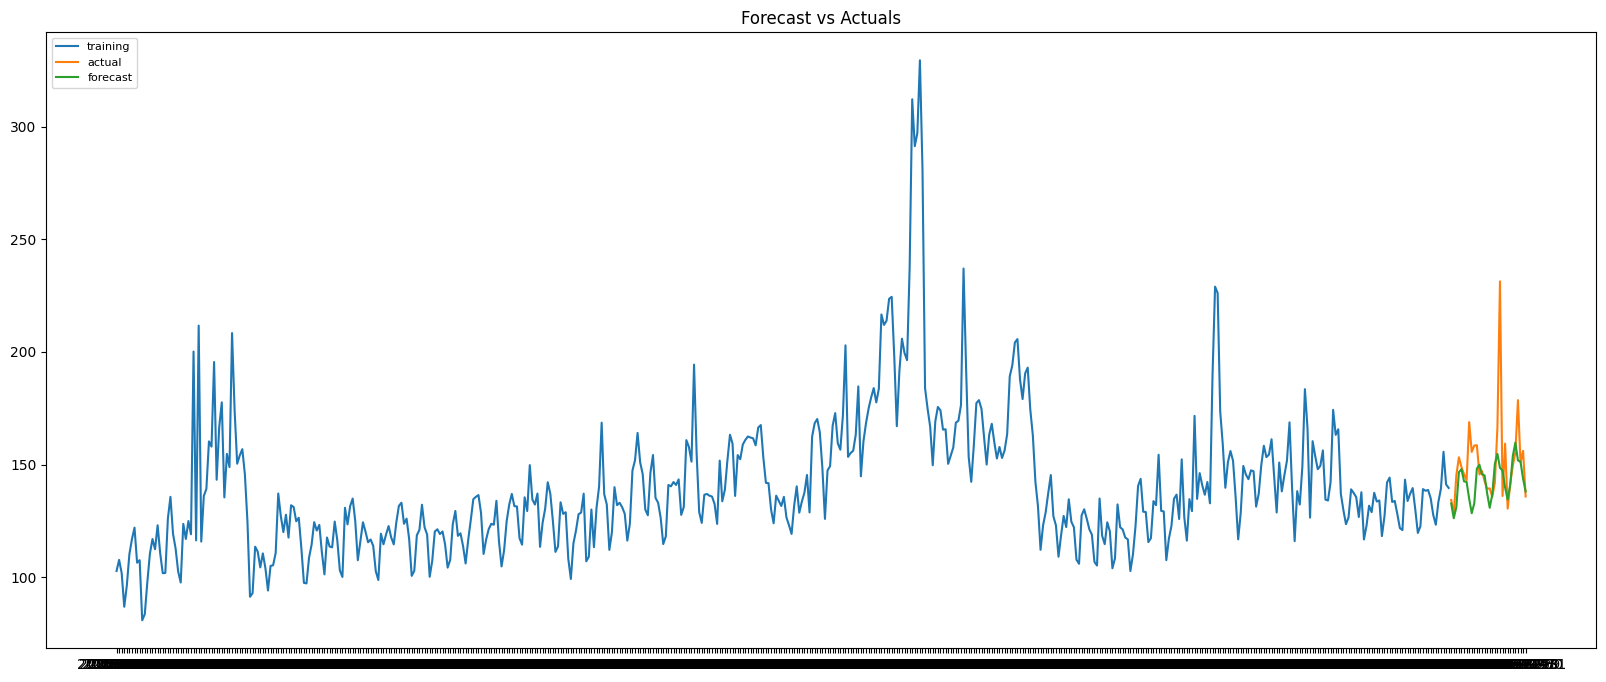

mape: 0.06579889824530792
rsme: 19.594633608188325
language:  ru
0.04725482525287878 [3, 0, 3]


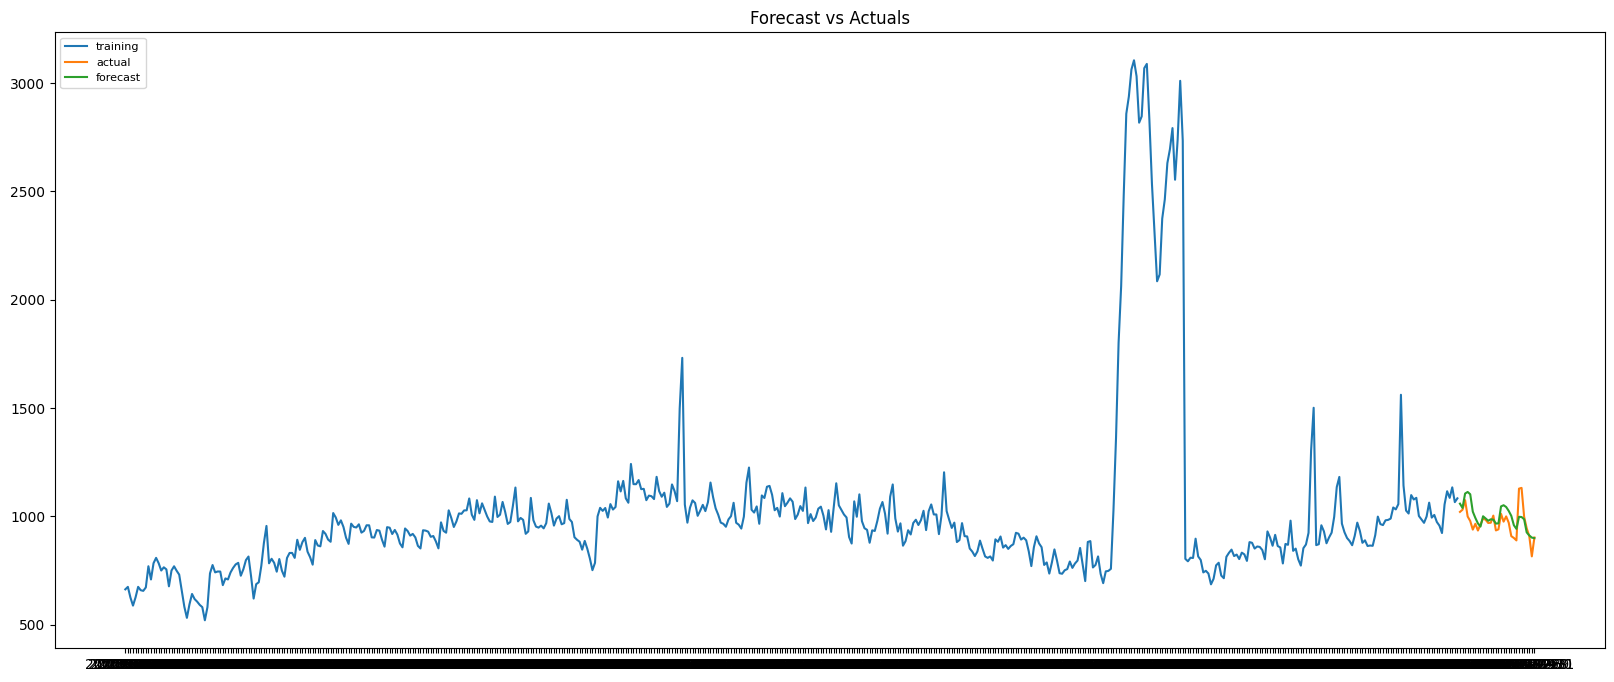

mape: 0.04725482525287878
rsme: 61.043180072149504
language:  zh
0.03258091801832103 [2, 2, 2]


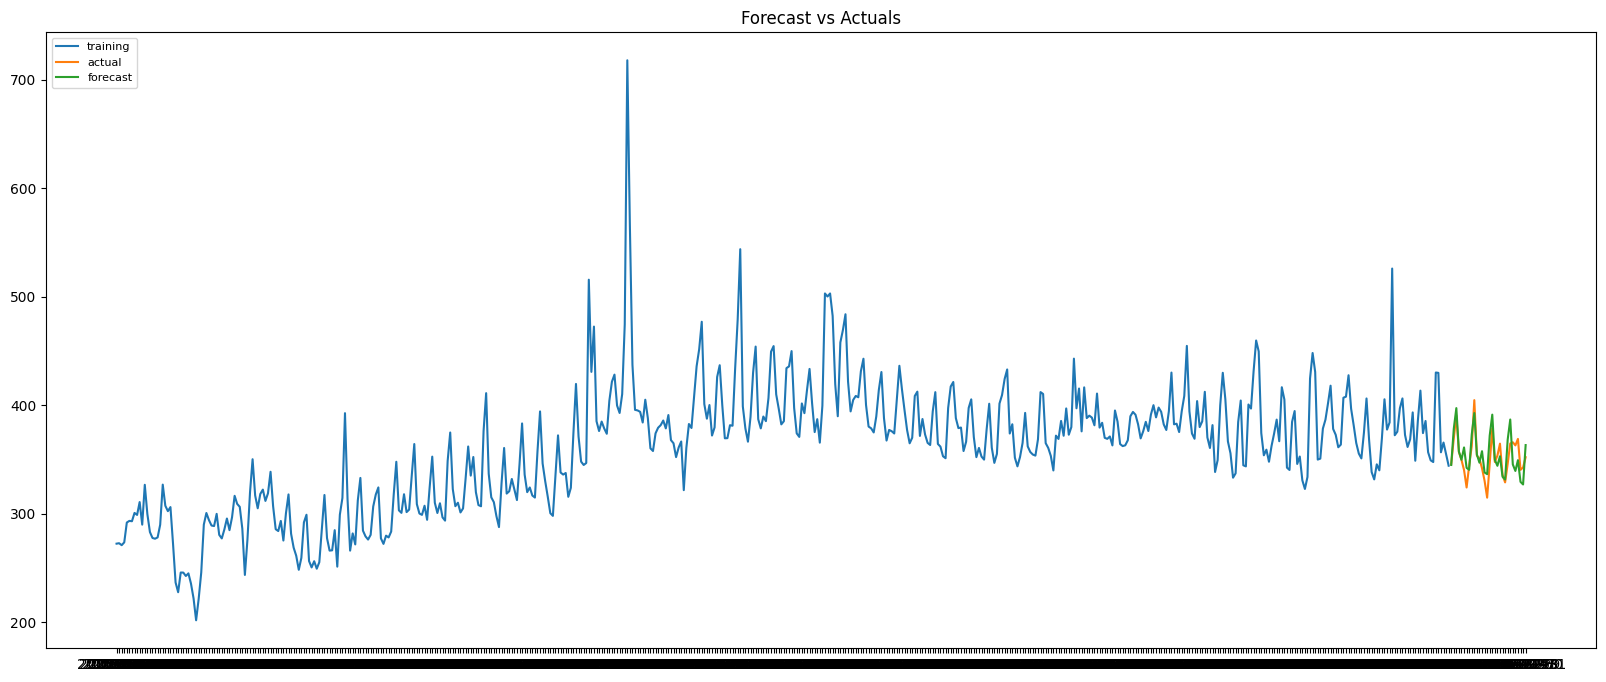

mape: 0.03258091801832103
rsme: 13.964034177162524


In [ ]:
#Defining Grid search to find best p,d,q values

def grid_search(data):
    values = [0, 1, 2, 3]
    mape = 100
    val = [0, 0, 0]
    for p in values:
        for d in values:
            for q in values:
                try:
                    model = SARIMAX(data[:-30], order=(p, d, q), seasonal_order=(p, d, q, 7), freq="D")
                    model_fit = model.fit()
                    fc = model_fit.forecast(30)

                    x = np.mean(np.abs(fc - data[-30:].values) / np.abs(data[-30:].values))
                    if x < mape:
                        mape = x
                        val = [p, d, q]
                except:
                    pass
    return mape, val


#Plotting SARIMAX for the best value of p,d,q and treating seasonality to be 7

def all_sarimax(train, test, val):
    model = SARIMAX(train, order=(val[0], val[1], val[2]), seasonal_order=(val[0], val[1], val[2],  7), freq="D")
    fitted = model.fit()
    fc = fitted.forecast(steps=len(test))


    fc_series = pd.Series(fc, index=test.index)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

    mape = np.mean(np.abs(fc - test.values) / np.abs(test.values))
    rmse = np.mean((fc - test.values) ** 2) ** .5
    print("mape:", mape)
    print("rsme:", rmse)
    return fc


#Storing predicted values for all languages using SARIMAX and storing the predicted values  in a  dictionary

views_prediction = {}
for c in df_lang:
    print("language: ", c)
    ts = df_lang[c]
    mape, val = grid_search(ts)
    print(mape, val)

    train = ts[:520]
    test = ts[520:]


    fc = all_sarimax(train, test, val)
    views_prediction[c] = fc


## **Conclusion:**

1. We have achieved model performance of 4.44% MAPE by using Prophet including exogeneous variable for "en" language and its the best MAPE value across the usage of different models.

2. SARIMAX including exogeneous variable was able to achieve 4.8% MAPE value which is the second bestest after prophet model

3. SARIMAX was able to forecast the results within its 95% confidence.

4. ARIMA was able to achieve best of 6.9% MAPE value using grid search approach

5. Exponential smoothing did the job of forecasting the data having MAPE of 5.6%

6. During time decomposition, we observed the residual had no trend and seasonality making the decomposition residual to be stationary, which signifies that the seasonality patterns and trend were decomposed efficiently leaving no further patterns.

7. Prophet model without exogeneous variable was able to achieve 8% of MAPE

## **Resources that could have improved model performances apart from "en" :**

1. I have not clipped the extremes in different langauges as that might be due to exogeneous dependencies.

2. We could have improved the other langauges model's performance by having the exogeneous data.

# **Questionnaire:**



## **1. Defining the problem statements and where can this and modifications of this be used?**

Ans: Problem Statement:

Ad Ease, a company that specializes in helping businesses get the most clicks at the lowest cost, is looking for a solution to automate and optimize their advertising campaigns. They need a system that can:

Design: Automatically generate visually appealing and effective ad creatives for different products and services.
Dispense: Intelligently place these ads on various platforms to reach the target audience.
Decipher: Analyze the performance of the ads and make data-driven decisions to improve future campaigns.
The goal is to develop an end-to-end solution that streamlines the entire advertising process, making it easier, more effective, and more economical for businesses to promote themselves.

Key Requirements:

Automation: The system should automate as much of the advertising process as possible, from ad creation to placement and performance analysis.
Optimization: The system should continuously optimize the ads and their placement to maximize clicks and minimize costs.
Data-Driven Insights: The system should provide data-driven insights into the performance of the ads to inform future decisions.
Scalability: The system should be able to handle a large number of ad campaigns and creatives.
Ease of Use: The system should be easy to use for businesses of all sizes and technical expertise.

Modifications of this analysis can be used to:

Forecast future values of the series.
Identify anomalies or outliers in the data.
Detect changes in the underlying trend or seasonality of the series.




# 2. **Inferences from the data visualizations:**

* There is a clear upward trend in the series over time.
* The series exhibits seasonality with regular peaks and troughs.
* There appears to be some volatility in the series, as evidenced by the fluctuations around the trend line.
* "en" and "ja" have the most number of wikipedia pages in the given data-set
* It's observed that "all-agents" have the highest count in "access origin"
* "all access" Access type has the most number of views.




# 3. **What does the decomposition of series do?**

Decomposition of a series involves breaking it down into its individual components: trend, seasonality, and residuals. This helps to identify the underlying patterns and trends in the data and to understand how they interact with each other.




# 4. **What level of differencing gave you a stationary series?**

The level of differencing required to achieve a stationary series will depend on the specific characteristics of the data. In this case, it appears that a first-order differencing was sufficient to remove any non-stationarity in the series.




#5. **Difference between ARIMA, SARIMA, & SARIMAX:**

ARIMA: Autoregressive Integrated Moving Average model. It is used for non-seasonal time series data.
SARIMA: Seasonal Autoregressive Integrated Moving Average model. It is used for seasonal time series data.
SARIMAX: Seasonal Autoregressive Integrated Moving Average with eXogenous variables model. It is used for seasonal time series data with exogenous variables.





#6. **Other methods suitable to get the model for all languages:**

Randomized search: This method randomly selects values for the model parameters from a predefined range. It is less computationally expensive than grid search but may not be as effective.

Bayesian optimization: This method uses a probabilistic model to guide the search for the optimal parameters. It is more computationally expensive than grid search but can be more effective, especially for complex models.

Evolutionary algorithms: These methods use evolutionary principles to search for the optimal parameters. They can be more effective than grid search for complex models, but they are also more computationally expensive.



#7. **Compare the number of views in different languages**

Language
de         17362
en         22486
es         13551
fr         16948
ja         19295
no lang    14494
ru         14270
zh         15211

